In [31]:
import pandas as pd
import os
import glob
import logging
import numpy
import matplotlib.pyplot as plt

In [7]:

fol_path = r'C:\\Users\\Ambik Mitra\\Downloads\\csv_data_2023'

Files = os.listdir(fol_path)

# Filter out non-CSV files
CSV_Files = [t for t in Files if t.endswith('.csv')]

# Create a list to hold the dataframes
df_listing = []
for csv in CSV_Files:
    File_path = os.path.join(fol_path, csv)
    
    try:
        print(csv)
        df = pd.read_csv(File_path, encoding='utf-8')
        print(df.columns)
    except UnicodeDecodeError:
        # If utf-8 fails, then utf-16
        print(csv)
        try:
            df = pd.read_csv(files_path, encoding='utf-16')
        except Exception as e:
            print(f'could not find file{csv}:{e}')
    except Exception as e:
        print(f'could not find file{csv}:{e}')
        print(df.columns)
        
    if df_listing is not None:
        df_listing.append(df)

22792700.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Is Electric'], dtype='object')
22792701.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Vehicle Age(years)',
       'Brand Name'],
      dtype='object')
22792702.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'AdditionalData1',
       'AdditionalData2'],
      dtype='object')
22792703.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Color',
       'Public/Private'],
      dtype='object')
22792704.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Colour',
       'Turn Signal'],
      dtype='object')
22792706.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Carpool',
       'Rideshare'],
      dtype='object')
22792708.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Vehicle Category',
       'Colour'],
      dtype='object')
22792711.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Vehicle Age(years)',
       'Brand Name'],
    

### 1 incompatible file is showing which is 22792751.csv

## Combining CSV files for the year 2023

In [10]:
# Concatenate all data into one DataFrame
df_entries = pd.concat(df_listing, ignore_index=True)

new_path= r'C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3'

# Save the final result to a new CSV file
df_entries.to_csv(os.path.join(new_path, 'COMBINED_file.csv'), index=False)

In [11]:
df_entries

,Date,Time,Direction,Type,Occupancy,Is Electric,Vehicle Age(years),Brand Name,AdditionalData1,AdditionalData2,...,EcoFriendly,Date of vehicle,Window_Tint,Rim_Type,Age Group,Type,Driver gender,Fuel type,Public / Private,Purpose
0,24-10-2023,9:30am,in,car,1,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24-10-2023,9:30am,in,car,1,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24-10-2023,9:30am,in,car,1,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24-10-2023,9:30am,in,car,1,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24-10-2023,9:30am,in,car,1,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,23-10-23,10.55am,in,car,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8545,23-10-23,10.55am,in,car,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8546,23-10-23,10.55am,in,car,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8547,23-10-23,10.55am,in,car,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning the data to these columns date, direction, time, type, brand, weather and Is_electric

In [12]:
# to find the sum of nan values 
df_entries[df_entries.columns[df_entries.columns.str.contains('Date', case=False)]].isna().sum()

Date               1279
Date               8073
Date of Car        8453
DATE               8135
Date Code          8315
date               8416
Date of vehicle    8356
dtype: int64

In [14]:
df_entries[df_entries.columns[df_entries.columns.str.contains('Date', case=False) & ~df_entries.columns.isin(['Date of Car','Date Code','Date of vehicle'])]].isna().sum()

Date     1279
Date     8073
DATE     8135
date     8416
dtype: int64

In [17]:
#Parsing date to datetime format
df_entries['Date1'] = pd.to_datetime(df_entries['Date'], errors='coerce')
df_entries['Formatted_Date1'] = df_entries['Date1'].dt.strftime('%d-%m-%y')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\939163369.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_entries['Date1'] = pd.to_datetime(df_entries['Date'], errors='coerce')


In [18]:
df_entries['Formatted_Date1']

0       24-10-23
1       24-10-23
2       24-10-23
3       24-10-23
4       24-10-23
          ...   
8544         NaN
8545         NaN
8546         NaN
8547         NaN
8548         NaN
Name: Formatted_Date1, Length: 8549, dtype: object

In [20]:
new='C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3'
df_entries.to_csv(os.path.join(new, 'c_file.csv'), index=False)

In [21]:
df_entries['Date2'] = pd.to_datetime(df_entries['Date '], errors='coerce')
df_entries['Formatted_Date2'] = df_entries['Date2'].dt.strftime('%d-%m-%y')

In [22]:
df_entries['Formatted_Date2']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8544    NaN
8545    NaN
8546    NaN
8547    NaN
8548    NaN
Name: Formatted_Date2, Length: 8549, dtype: object

In [23]:
df_entries['Formatted_Date2'].isna().sum()

8393

In [24]:
df_entries['Date3'] = pd.to_datetime(df_entries['DATE'], errors='coerce')
df_entries['Formatted_Date3'] = df_entries['Date3'].dt.strftime('%d-%m-%y')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\2508946735.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_entries['Date3'] = pd.to_datetime(df_entries['DATE'], errors='coerce')


In [25]:
df_entries['Date4'] = pd.to_datetime(df_entries['date'], errors='coerce')
df_entries['Formatted_Date4'] = df_entries['Date4'].dt.strftime('%d-%m-%y')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\497421879.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_entries['Date4'] = pd.to_datetime(df_entries['date'], errors='coerce')
C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\497421879.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_entries['Date4'] = pd.to_datetime(df_entries['date'], errors='coerce')
C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\497421879.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

In [28]:
df_entries['Formatted_Date4'].count()

133

In [31]:
df_entries['Updated_Date'] = df_entries['Formatted_Date1'].fillna(value=df_entries['Formatted_Date2'])

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\654710230.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_entries['Updated_Date'] = df_entries['Formatted_Date1'].fillna(value=df_entries['Formatted_Date2'])


In [37]:
df_entries['Updated_Date'].count()

6204

In [38]:
df_entries['Updated_Date1'] = df_entries['Updated_Date'].fillna(value=df_entries['Formatted_Date3'])

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\464322457.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_entries['Updated_Date1'] = df_entries['Updated_Date'].fillna(value=df_entries['Formatted_Date3'])


In [39]:
df_entries['Updated_Date2'] = df_entries['Updated_Date1'].fillna(value=df_entries['Formatted_Date4'])

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\3500130114.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_entries['Updated_Date2'] = df_entries['Updated_Date1'].fillna(value=df_entries['Formatted_Date4'])


In [40]:
df_entries[df_entries.columns[df_entries.columns.str.contains('Date', case=False)]].isna().sum()

Date               1279
Date               8073
Date of Car        8453
DATE               8135
Date Code          8315
date               8416
Date of vehicle    8356
Date1              2501
Formatted_Date1    2501
Date2              8393
Formatted_Date2    8393
Date3              8135
Formatted_Date3    8135
Date4              8416
Formatted_Date4    8416
Updated_Date       2345
Updated_Date1      1931
Updated_Date2      1798
dtype: int64

In [41]:
df_entries=df_entries.drop(['Date','Date ','DATE','date','Date1','Date2','Date3','Date4','Formatted_Date1','Formatted_Date2','Formatted_Date3','Formatted_Date4'],axis=1)

In [44]:
df_entries['Updated_Date2'].count()

6751

In [45]:
df_entries=df_entries.drop(['Updated_Date','Updated_Date1'],axis=1)

In [46]:
df_entries

,Time,Direction,Type,Occupancy,Is Electric,Vehicle Age(years),Brand Name,AdditionalData1,AdditionalData2,Color,...,Date of vehicle,Window_Tint,Rim_Type,Age Group,Type,Driver gender,Fuel type,Public / Private,Purpose,Updated_Date2
0,9:30am,in,car,1,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23
1,9:30am,in,car,1,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23
2,9:30am,in,car,1,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23
3,9:30am,in,car,1,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23
4,9:30am,in,car,1,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,10.55am,in,car,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8545,10.55am,in,car,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8546,10.55am,in,car,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8547,10.55am,in,car,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df_entries['Updated_Date2'].isna().sum()

1798

In [48]:
df_entries.columns.values.view()

array(['Time', 'Direction', 'Type', 'Occupancy', 'Is Electric',
       'Vehicle Age(years)', 'Brand Name', 'AdditionalData1',
       'AdditionalData2', 'Color', 'Public/Private', 'Colour',
       'Turn Signal', 'Carpool', 'Rideshare', 'Vehicle Category',
       'Driver Gender', 'Fuel Type', 'is_carpool', 'is_rideshare', 'EV',
       'Car Brand', 'Electric', 'Part of Mobility Service', 'Origin',
       'Age_Id', 'Is_env_friendly', 'Brand', 'Eco-Friendly',
       'Date of Car', 'Unnamed: 7', 'Service', 'Size', 'Vehicle Purpose',
       'Driver_Gender', 'Mode_of_Travel', 'Public Vehicle', 'Safety',
       'Age Identifier', 'Year', 'Age group', 'Vehicle Type', 'Make',
       'Green Badge', 'TIME', 'DIRECTION', 'VEHICLE TYPE',
       'VEHICLE OCCUPANCY', 'WEATHER', 'Family Car', 'Zero Emissions',
       'Low Emissions Compliant', 'MobilityService', 'Manufacturing Data',
       'Manufactured after 2015', 'Left', 'Right', 'CAR', 'BUS',
       'BICYCLE', 'MOTORBIKE', 'TAXI', 'SCOOTER', 'VAN', 

In [49]:
df_entries[df_entries.columns[df_entries.columns.str.contains('Time', case=False)]].isna().sum()

Time     1221
TIME     8127
 Time    8131
time     8416
dtype: int64

In [50]:
# Parsing date
df_entries['Time1'] = pd.to_datetime(df_entries['Time'], errors='coerce')
df_entries['Formatted_Time1'] = df_entries['Time1'].dt.strftime('%H:%M:%S')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\2017849976.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_entries['Time1'] = pd.to_datetime(df_entries['Time'], errors='coerce')


In [51]:
df_entries['Time2'] = pd.to_datetime(df_entries['TIME'], errors='coerce')
df_entries['Formatted_Time2'] = df_entries['Time2'].dt.strftime('%H:%M:%S')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\319469594.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_entries['Time2'] = pd.to_datetime(df_entries['TIME'], errors='coerce')


In [52]:
df_entries['Time3'] = pd.to_datetime(df_entries[' Time'], errors='coerce')
df_entries['Formatted_Time3'] = df_entries['Time3'].dt.strftime('%H:%M:%S')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\4251361020.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_entries['Time3'] = pd.to_datetime(df_entries[' Time'], errors='coerce')


In [53]:
df_entries['Time4'] = pd.to_datetime(df_entries['time'], errors='coerce')
df_entries['Formatted_Time4'] = df_entries['Time4'].dt.strftime('%H:%M:%S')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\2552085444.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_entries['Time4'] = pd.to_datetime(df_entries['time'], errors='coerce')
C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\2552085444.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_entries['Formatted_Time4'] = df_entries['Time4'].dt.strftime('%H:%M:%S')


In [55]:
df_entries['Formatted_Time4'].dtypes

dtype('O')

In [56]:
df_entries['Updated_Time'] = df_entries['Formatted_Time1'].fillna(value=df_entries['Formatted_Time2'])

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\789121130.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_entries['Updated_Time'] = df_entries['Formatted_Time1'].fillna(value=df_entries['Formatted_Time2'])


In [57]:
df_entries['Updated_Time1'] = df_entries['Updated_Time'].fillna(value=df_entries['Formatted_Time3'])

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\137252356.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_entries['Updated_Time1'] = df_entries['Updated_Time'].fillna(value=df_entries['Formatted_Time3'])


In [58]:
df_entries['Updated_Time2'] = df_entries['Updated_Time1'].fillna(value=df_entries['Formatted_Time4'])

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\1573896740.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_entries['Updated_Time2'] = df_entries['Updated_Time1'].fillna(value=df_entries['Formatted_Time4'])


In [69]:
df_entries['Updated_Time2'].count()

3387

In [68]:
df_entries['Formatted_Time4'].count()

133

In [75]:
df_entries['Time5'] = pd.to_datetime(df_entries[' Time'], format='%I.%M%p', errors='coerce')
df_entries['Formatted_Time6'] = df_entries['Time5'].dt.strftime('%H:%M:%S')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\2749646107.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_entries['Time5'] = pd.to_datetime(df_entries[' Time'], format='%I.%M%p', errors='coerce')
C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_25364\2749646107.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_entries['Formatted_Time6'] = df_entries['Time5'].dt.strftime('%H:%M:%S')


In [76]:
df_entries['Formatted_Time6'].count()

51

In [78]:
df_entries[' Time'].isna().sum()

8498

In [79]:
df_entries=df_entries.drop(['Time',' Time','TIME','time','Formatted_Time3','Formatted_Time5','Updated_Time','Updated_Time1','Updated_Time2','Time1','Time2','Time3','Time4','Time5'],axis=1)

In [80]:
df_entries['Updated_Time'] = df_entries['Formatted_Time1'].fillna(value=df_entries['Formatted_Time2'])

In [81]:
df_entries['Updated_Time1'] = df_entries['Updated_Time'].fillna(value=df_entries['Formatted_Time6'])

In [82]:
df_entries['Updated_Time2'] = df_entries['Updated_Time1'].fillna(value=df_entries['Formatted_Time4'])

In [83]:
df_entries['Updated_Time2'].count()

3438

In [84]:
df_entries=df_entries.drop(['Formatted_Time1','Formatted_Time2','Formatted_Time4','Formatted_Time6','Updated_Time','Updated_Time1'],axis=1)

In [85]:
df_entries

,Direction,Type,Occupancy,Is Electric,Vehicle Age(years),Brand Name,AdditionalData1,AdditionalData2,Color,Public/Private,...,Window_Tint,Rim_Type,Age Group,Type,Driver gender,Fuel type,Public / Private,Purpose,Updated_Date2,Updated_Time2
0,in,car,1,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23,09:30:00
1,in,car,1,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23,09:30:00
2,in,car,1,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23,09:30:00
3,in,car,1,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23,09:30:00
4,in,car,1,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23,09:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,in,car,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8545,in,car,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8546,in,car,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8547,in,car,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df_entries[df_entries.columns[df_entries.columns.str.contains('Type', case=False)]].isna().sum()

Type               1718
Fuel Type          8196
Vehicle Type       8363
VEHICLE TYPE       8127
Type of vehicle    8508
Type of Vehicle    8502
 Type              8131
vehicle_type       8416
Rim_Type           8498
Type               8487
Fuel type          8487
dtype: int64

In [89]:
df_entries['Vehicle Type']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8544    NaN
8545    NaN
8546    NaN
8547    NaN
8548    NaN
Name: Vehicle Type, Length: 8549, dtype: object

In [90]:
df_entries[df_entries.columns[df_entries.columns.str.contains('Type', case=False) & ~df_entries.columns.isin(['Fuel Type','Rim_Type','Fuel type'])]].isna().sum()

Type               1718
Vehicle Type       8363
VEHICLE TYPE       8127
Type of vehicle    8508
Type of Vehicle    8502
 Type              8131
vehicle_type       8416
Type               8487
dtype: int64

In [91]:
df_entries['Updated_Type'] = df_entries['Type'].fillna(value=df_entries['Vehicle Type'])

In [92]:
df_entries['Updated_Type1'] = df_entries['Updated_Type'].fillna(value=df_entries['VEHICLE TYPE'])

In [93]:
df_entries['Updated_Type2'] = df_entries['Updated_Type1'].fillna(value=df_entries['Type of vehicle'])

In [94]:
df_entries['Updated_Type3'] = df_entries['Updated_Type2'].fillna(value=df_entries['Type of Vehicle'])

In [95]:
df_entries['Updated_Type4'] = df_entries['Updated_Type3'].fillna(value=df_entries[' Type'])

In [96]:
df_entries['Updated_Type5'] = df_entries['Updated_Type4'].fillna(value=df_entries['vehicle_type'])

In [97]:
df_entries['Updated_Type6'] = df_entries['Updated_Type5'].fillna(value=df_entries['Type '])

In [99]:
df_entries['Updated_Type6'].count()

8140

In [100]:
df_entries=df_entries.drop(['Updated_Type','Updated_Type1','Updated_Type2','Updated_Type3','Updated_Type4','Updated_Type5','Type','Vehicle Type','VEHICLE TYPE','Type of vehicle','Type of Vehicle',' Type','vehicle_type','Type '],axis=1)

In [101]:
df_entries

,Direction,Occupancy,Is Electric,Vehicle Age(years),Brand Name,AdditionalData1,AdditionalData2,Color,Public/Private,Colour,...,Window_Tint,Rim_Type,Age Group,Driver gender,Fuel type,Public / Private,Purpose,Updated_Date2,Updated_Time2,Updated_Type6
0,in,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23,09:30:00,car
1,in,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23,09:30:00,car
2,in,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23,09:30:00,car
3,in,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23,09:30:00,car
4,in,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24-10-23,09:30:00,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,in,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,black,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car
8545,in,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,silver,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car
8546,in,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car
8547,in,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,car


In [102]:
df_entries[df_entries.columns[df_entries.columns.str.contains('Direction', case=False)]].isna().sum()

Direction     1222
DIRECTION     8127
 Direction    8131
direction     8416
dtype: int64

In [103]:
df_entries['Updated_Direction'] = df_entries['Direction'].fillna(value=df_entries['DIRECTION'])

In [104]:
df_entries['Updated_Direction1'] = df_entries['Updated_Direction'].fillna(value=df_entries[' Direction'])

In [105]:
df_entries['Updated_Direction2'] = df_entries['Updated_Direction1'].fillna(value=df_entries['direction'])

In [106]:
df_entries['Updated_Direction2'].count()

8300

In [107]:
df_entries=df_entries.drop(['Direction','DIRECTION',' Direction','direction'],axis=1)

In [108]:
df_entries

,Occupancy,Is Electric,Vehicle Age(years),Brand Name,AdditionalData1,AdditionalData2,Color,Public/Private,Colour,Turn Signal,...,Driver gender,Fuel type,Public / Private,Purpose,Updated_Date2,Updated_Time2,Updated_Type6,Updated_Direction,Updated_Direction1,Updated_Direction2
0,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24-10-23,09:30:00,car,in,in,in
1,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24-10-23,09:30:00,car,in,in,in
2,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24-10-23,09:30:00,car,in,in,in
3,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24-10-23,09:30:00,car,in,in,in
4,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24-10-23,09:30:00,car,in,in,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,black,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,car,in,in,in
8545,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,silver,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,car,in,in,in
8546,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,car,in,in,in
8547,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,car,in,in,in


In [110]:
df_entries[df_entries.columns[df_entries.columns.str.contains('Brand', case=False)]].isna().sum()

Brand Name       8385
Car Brand        8368
Brand            7773
Vehicle Brand    8506
dtype: int64

In [111]:
df_entries['Updated_Brand'] = df_entries['Brand Name'].fillna(value=df_entries['Car Brand'])

In [112]:
df_entries['Updated_Brand1'] = df_entries['Updated_Brand'].fillna(value=df_entries['Brand'])

In [113]:
df_entries['Updated_Brand2'] = df_entries['Updated_Brand1'].fillna(value=df_entries['Vehicle Brand'])

In [115]:
df_entries['Updated_Brand2'].count()

1164

In [116]:
df_entries=df_entries.drop(['Brand Name','Car Brand','Brand','Vehicle Brand','Updated_Brand1','Updated_Brand'],axis=1)

In [121]:
df_entries[df_entries.columns[df_entries.columns.str.contains('Electric|EV|Is_env_friendly|EcoFriendly', case=False)]].isna().sum()

Is Electric        8314
EV                 8368
Electric           7527
Is_env_friendly    8483
EcoFriendly        8344
dtype: int64

In [123]:
df_entries['Updated_Is_Electric'] = df_entries['Is Electric'].fillna(value=df_entries['EV'])
df_entries['Updated_Is_Electric1'] = df_entries['Updated_Is_Electric'].fillna(value=df_entries['Electric'])
df_entries['Updated_Is_Electric2'] = df_entries['Updated_Is_Electric1'].fillna(value=df_entries['Is_env_friendly'])
df_entries['Updated_Is_Electric3'] = df_entries['Updated_Is_Electric2'].fillna(value=df_entries['EcoFriendly'])

In [124]:
df_entries['Updated_Is_Electric3'].count()

1709

In [125]:
df_entries=df_entries.drop(['Is Electric','EV','Electric','Is_env_friendly','EcoFriendly','Updated_Is_Electric','Updated_Is_Electric1','Updated_Is_Electric2'],axis=1)

In [126]:
df_entries

,Occupancy,Vehicle Age(years),AdditionalData1,AdditionalData2,Color,Public/Private,Colour,Turn Signal,Carpool,Rideshare,...,Public / Private,Purpose,Updated_Date2,Updated_Time2,Updated_Type6,Updated_Direction,Updated_Direction1,Updated_Direction2,Updated_Brand2,Updated_Is_Electric3
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24-10-23,09:30:00,car,in,in,in,NaN,No
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24-10-23,09:30:00,car,in,in,in,NaN,No
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24-10-23,09:30:00,car,in,in,in,NaN,No
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24-10-23,09:30:00,car,in,in,in,NaN,No
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24-10-23,09:30:00,car,in,in,in,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,2,NaN,NaN,NaN,NaN,NaN,black,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,car,in,in,in,NaN,NaN
8545,2,NaN,NaN,NaN,NaN,NaN,silver,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,car,in,in,in,NaN,NaN
8546,1,NaN,NaN,NaN,NaN,NaN,blue,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,car,in,in,in,NaN,NaN
8547,1,NaN,NaN,NaN,NaN,NaN,white,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,car,in,in,in,NaN,NaN


In [127]:
df_entries[df_entries.columns[df_entries.columns.str.contains('Weather', case=False)]].isna().sum()

WEATHER    8127
Weather    8077
dtype: int64

In [128]:
df_entries['Updated_Weather'] = df_entries['WEATHER'].fillna(value=df_entries['Weather'])

In [129]:
df_entries['Updated_Weather'].count()

894

In [130]:
df_entries=df_entries.drop(['WEATHER','Weather'],axis=1)

In [131]:
df_entries

,Occupancy,Vehicle Age(years),AdditionalData1,AdditionalData2,Color,Public/Private,Colour,Turn Signal,Carpool,Rideshare,...,Purpose,Updated_Date2,Updated_Time2,Updated_Type6,Updated_Direction,Updated_Direction1,Updated_Direction2,Updated_Brand2,Updated_Is_Electric3,Updated_Weather
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24-10-23,09:30:00,car,in,in,in,NaN,No,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24-10-23,09:30:00,car,in,in,in,NaN,No,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24-10-23,09:30:00,car,in,in,in,NaN,No,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24-10-23,09:30:00,car,in,in,in,NaN,No,NaN
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24-10-23,09:30:00,car,in,in,in,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8544,2,NaN,NaN,NaN,NaN,NaN,black,NaN,NaN,NaN,...,NaN,NaN,NaN,car,in,in,in,NaN,NaN,NaN
8545,2,NaN,NaN,NaN,NaN,NaN,silver,NaN,NaN,NaN,...,NaN,NaN,NaN,car,in,in,in,NaN,NaN,NaN
8546,1,NaN,NaN,NaN,NaN,NaN,blue,NaN,NaN,NaN,...,NaN,NaN,NaN,car,in,in,in,NaN,NaN,NaN
8547,1,NaN,NaN,NaN,NaN,NaN,white,NaN,NaN,NaN,...,NaN,NaN,NaN,car,in,in,in,NaN,NaN,NaN


In [132]:
new='C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3'
df_entries.to_csv(os.path.join(new, 'c_file.csv'), index=False)

In [134]:
transfer_columns=['Updated_Date2', 'Updated_Time2', 'Updated_Type6', 'Updated_Direction2', 'Updated_Brand2', 'Updated_Is_Electric3', 'Updated_Weather']
df_field=df_entries.loc[:,transfer_columns]

In [135]:
df_field

,Updated_Date2,Updated_Time2,Updated_Type6,Updated_Direction2,Updated_Brand2,Updated_Is_Electric3,Updated_Weather
0,24-10-23,09:30:00,car,in,NaN,No,NaN
1,24-10-23,09:30:00,car,in,NaN,No,NaN
2,24-10-23,09:30:00,car,in,NaN,No,NaN
3,24-10-23,09:30:00,car,in,NaN,No,NaN
4,24-10-23,09:30:00,car,in,NaN,No,NaN
...,...,...,...,...,...,...,...
8544,NaN,NaN,car,in,NaN,NaN,NaN
8545,NaN,NaN,car,in,NaN,NaN,NaN
8546,NaN,NaN,car,in,NaN,NaN,NaN
8547,NaN,NaN,car,in,NaN,NaN,NaN


In [136]:
new='C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3'
df_field.to_csv(os.path.join(new, 'c_file.csv'), index=False)

In [137]:
df_field

,Updated_Date2,Updated_Time2,Updated_Type6,Updated_Direction2,Updated_Brand2,Updated_Is_Electric3,Updated_Weather
0,24-10-23,09:30:00,car,in,NaN,No,NaN
1,24-10-23,09:30:00,car,in,NaN,No,NaN
2,24-10-23,09:30:00,car,in,NaN,No,NaN
3,24-10-23,09:30:00,car,in,NaN,No,NaN
4,24-10-23,09:30:00,car,in,NaN,No,NaN
...,...,...,...,...,...,...,...
8544,NaN,NaN,car,in,NaN,NaN,NaN
8545,NaN,NaN,car,in,NaN,NaN,NaN
8546,NaN,NaN,car,in,NaN,NaN,NaN
8547,NaN,NaN,car,in,NaN,NaN,NaN


In [3]:
df_field= pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\c_file.csv')

In [4]:
df_field['Updated_Date2'].count()

7566

In [5]:
df_field

,Updated_Date2,Updated_Time2,Updated_Type6,Updated_Direction2,Updated_Brand2,Updated_Is_Electric3,Updated_Weather
0,24-10-2023,09:30:00,car,in,NaN,No,NaN
1,24-10-2023,09:30:00,car,in,NaN,No,NaN
2,24-10-2023,09:30:00,car,in,NaN,No,NaN
3,24-10-2023,09:30:00,car,in,NaN,No,NaN
4,24-10-2023,09:30:00,car,in,NaN,No,NaN
...,...,...,...,...,...,...,...
7561,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7562,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7563,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7564,23-10-2023,10:55:00,car,in,NaN,NaN,NaN


In [8]:
df_field['Updated_Type6'].unique()

array(['car', 'bus', 'taxi', 'motorbike', 'van', 'bicycle', 'lorry',
       'Bus', 'Car', 'Taxi', 'Van', 'Bicycle', 'Lorry', 'bus ', 'Bu', 'C',
       'V', 'L', 'S', 'T', 'scooter', 'mini truck', 'truck', 'bike',
       'Motorbike', 'motorcycle', 'other', 'bicycle ', 'van ', 'car ',
       'scooter ', nan, 'Truck', 'Bike', 'Authorised Vehicle',
       'double decker bus', 'single decker bus', ' car', ' van', ' bus',
       ' lorry', ' taxi', ' bicycle', ' motorbike', ' scooter', 'A:V',
       'Bus ', 'M', 'Bi', 'motor', 'moterbike', 'u2'], dtype=object)

In [10]:
df_field['Updated_Type6'] = df_field['Updated_Type6'].replace({'truck':'lorry','mini truck':'lorry','Lorry':'lorry','C':'car','V':'van','L':'lorry','S':'scooter','bike':'motorbike','Authorised Vehicle':'car','double decker bus':'bus','single decker bus':'bus','moterbike':'motorbike','Bu':'bus','T':'taxi','motorcycle':'motorbike','u2':'bus','A:V':'van','M':'motorbike','Bike':'motorbike','motor':'motorbike','bike':'motorbike','Bi':'bicycle','Bus ':'bus','van ':'van','other':'car',' car':'car',' bus':'bus',' bicycle':'bicycle',' motorbike':'motorbike',' scooter':'scooter',' van':'van'})

In [11]:
df_field['Updated_Type6'].unique()

array(['car', 'bus', 'taxi', 'motorbike', 'van', 'bicycle', 'lorry',
       'Bus', 'Car', 'Taxi', 'Van', 'Bicycle', 'bus ', 'scooter',
       'Motorbike', 'bicycle ', 'car ', 'scooter ', nan, 'Truck',
       ' lorry', ' taxi'], dtype=object)

In [12]:
df_field['Updated_Type6']=df_field['Updated_Type6'].replace({'Bus':'bus','Car':'car','Van':'van','Bicycle':'bicycle','bus ':'bus','scooter ':'scooter','Truck':'truck',' taxi':'taxi',' lorry':'lorry','Motorbike':'motorbike'})

In [13]:
df_field['Updated_Type6'].unique()

array(['car', 'bus', 'taxi', 'motorbike', 'van', 'bicycle', 'lorry',
       'Taxi', 'scooter', 'bicycle ', 'car ', nan, 'truck'], dtype=object)

In [14]:
df_field['Updated_Type6']=df_field['Updated_Type6'].replace({'Taxi':'taxi','bicycle ':'bicycle','car ':'car','truck':'lorry'})

In [15]:
df_field['Updated_Type6'].unique()

array(['car', 'bus', 'taxi', 'motorbike', 'van', 'bicycle', 'lorry',
       'scooter', nan], dtype=object)

In [16]:
df_field

,Updated_Date2,Updated_Time2,Updated_Type6,Updated_Direction2,Updated_Brand2,Updated_Is_Electric3,Updated_Weather
0,24-10-2023,09:30:00,car,in,NaN,No,NaN
1,24-10-2023,09:30:00,car,in,NaN,No,NaN
2,24-10-2023,09:30:00,car,in,NaN,No,NaN
3,24-10-2023,09:30:00,car,in,NaN,No,NaN
4,24-10-2023,09:30:00,car,in,NaN,No,NaN
...,...,...,...,...,...,...,...
7561,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7562,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7563,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7564,23-10-2023,10:55:00,car,in,NaN,NaN,NaN


In [18]:
df_field['Updated_Direction2'].unique()

array(['in', 'Out', 'out', 'IN', 'In', 'OUT', ' ', ' in'], dtype=object)

In [19]:
df_field['Updated_Direction2']=df_field['Updated_Direction2'].replace({'Out':'out','IN':'in','OUT':'out','In':'in'})

In [21]:
df_field['Updated_Direction2'].unique()

array(['in', 'out', ' ', ' in'], dtype=object)

In [22]:
df_field['Updated_Direction2']=df_field['Updated_Direction2'].replace({' in':'in'})

In [23]:
df_field['Updated_Direction2'].unique()

array(['in', 'out', ' '], dtype=object)

In [25]:
df_field['Updated_Brand2'].unique()

array([nan, 'Aquae', 'Specialized', 'Honda', 'Mercedes', 'Hyundai',
       'Toyota', 'Renault', 'Skoda', 'Citroën', 'Vauxhall', 'Jeep', 'Kia',
       'BMW', 'Volkswagon', 'Trek', 'Fiat', 'Peugeot', 'Wessex Connect',
       'Nissan', 'Yaha', 'Bentley', 'Mazda', 'Audi', 'Canyon', 'Ford',
       'Seat', 'Range Rover', 'Citroen', 'Volvo', 'Mitsubishi', 'Wessex',
       'Lexus', 'Volkswagen', 'Tesla', 'Benz', 'Suzuki', 'Mini',
       'Mercedes Benz', 'Jaguar', 'MG', 'MIni', 'Scania', 'Puegeot',
       'Subaru', 'Land Rover', 'Other', 'Japanese brand', 'Volksvaken',
       'Jeep ', 'volkswagen', 'renault', ' ', 'audi', 'mercedes',
       'nissan', 'suzuki', 'mazda', 'ford', 'pegout', 'bmw',
       'royal enfield', 'vauxhaul', 'mini cooper', 'citreon', 'yaha',
       'hundai', 'bwm', 'fiat', 'toyota', 'volvo', 'kia', 'mitsubishi',
       'Mercedes-Benz', 'Cpagna', 'DAF', 'FirstGroup', 'peugeot',
       'japanesebrand', 'other', 'skoda', 'mini', 'vauxhall', 'citroen',
       'volksvaken', 'jap

In [26]:
df_field['Updated_Brand2']=df_field['Updated_Brand2'].replace({'Citroën':'Citroen','citreon':'Citroen','yaha':'Yamaha'})

In [27]:
df_field['Updated_Brand2'].unique()

array([nan, 'Aquae', 'Specialized', 'Honda', 'Mercedes', 'Hyundai',
       'Toyota', 'Renault', 'Skoda', 'Citroen', 'Vauxhall', 'Jeep', 'Kia',
       'BMW', 'Volkswagon', 'Trek', 'Fiat', 'Peugeot', 'Wessex Connect',
       'Nissan', 'Yaha', 'Bentley', 'Mazda', 'Audi', 'Canyon', 'Ford',
       'Seat', 'Range Rover', 'Volvo', 'Mitsubishi', 'Wessex', 'Lexus',
       'Volkswagen', 'Tesla', 'Benz', 'Suzuki', 'Mini', 'Mercedes Benz',
       'Jaguar', 'MG', 'MIni', 'Scania', 'Puegeot', 'Subaru',
       'Land Rover', 'Other', 'Japanese brand', 'Volksvaken', 'Jeep ',
       'volkswagen', 'renault', ' ', 'audi', 'mercedes', 'nissan',
       'suzuki', 'mazda', 'ford', 'pegout', 'bmw', 'royal enfield',
       'vauxhaul', 'mini cooper', 'Yamaha', 'hundai', 'bwm', 'fiat',
       'toyota', 'volvo', 'kia', 'mitsubishi', 'Mercedes-Benz', 'Cpagna',
       'DAF', 'FirstGroup', 'peugeot', 'japanesebrand', 'other', 'skoda',
       'mini', 'vauxhall', 'citroen', 'volksvaken', 'japanese brand',
       'Aston

In [29]:
df_field['Updated_Brand2'] = df_field['Updated_Brand2'].str.capitalize()

In [30]:
df_field['Updated_Brand2'].unique()

array([nan, 'Aquae', 'Specialized', 'Honda', 'Mercedes', 'Hyundai',
       'Toyota', 'Renault', 'Skoda', 'Citroen', 'Vauxhall', 'Jeep', 'Kia',
       'Bmw', 'Volkswagon', 'Trek', 'Fiat', 'Peugeot', 'Wessex connect',
       'Nissan', 'Yaha', 'Bentley', 'Mazda', 'Audi', 'Canyon', 'Ford',
       'Seat', 'Range rover', 'Volvo', 'Mitsubishi', 'Wessex', 'Lexus',
       'Volkswagen', 'Tesla', 'Benz', 'Suzuki', 'Mini', 'Mercedes benz',
       'Jaguar', 'Mg', 'Scania', 'Puegeot', 'Subaru', 'Land rover',
       'Other', 'Japanese brand', 'Volksvaken', 'Jeep ', ' ', 'Pegout',
       'Royal enfield', 'Vauxhaul', 'Mini cooper', 'Yamaha', 'Hundai',
       'Bwm', 'Mercedes-benz', 'Cpagna', 'Daf', 'Firstgroup',
       'Japanesebrand', 'Aston matin', 'Dacia', 'Fiesta'], dtype=object)

In [31]:
df_field['Updated_Brand2']=df_field['Updated_Brand2'].replace({'Bmw':'BMW','Volkswagon':'Volkswagen','Yaha':'Yamaha','Wessex connect':'Wessex Connect','Range rover':'Range Rover','Wessex':'Wessex Connect','Benz':'Mercedes','Mini':'Mini Cooper','Mercedez benz':'Mercedes','Mg':'MG','Land rover':'Land Rover','Other':'MG','Volksvaken':'Volkswagen','Jeep ':'Jeep','Pegout':'Peugeot','Royal enfield':'Royal Enfield','Vauxhaul':'Vauxhall','Mini cooper':'Mini Cooper','Hundai':'Hyundai','Bwm':'BMW','Mercedes-benz':'Mercedes','Cpagna':'Campagna','Daf':'DAF','Firstgroup':'FirstGroup','Japanesebrand':'Japanese brand','Aston matin':'Aston Martin'})

In [32]:
df_field['Updated_Brand2'].unique()

array([nan, 'Aquae', 'Specialized', 'Honda', 'Mercedes', 'Hyundai',
       'Toyota', 'Renault', 'Skoda', 'Citroen', 'Vauxhall', 'Jeep', 'Kia',
       'BMW', 'Volkswagen', 'Trek', 'Fiat', 'Peugeot', 'Wessex Connect',
       'Nissan', 'Yamaha', 'Bentley', 'Mazda', 'Audi', 'Canyon', 'Ford',
       'Seat', 'Range Rover', 'Volvo', 'Mitsubishi', 'Lexus', 'Tesla',
       'Suzuki', 'Mini Cooper', 'Mercedes benz', 'Jaguar', 'MG', 'Scania',
       'Puegeot', 'Subaru', 'Land Rover', 'Japanese brand', ' ',
       'Royal Enfield', 'Campagna', 'DAF', 'FirstGroup', 'Aston Martin',
       'Dacia', 'Fiesta'], dtype=object)

In [33]:
df_field['Updated_Is_Electric3'].unique()

array(['No', 'Yes', nan, 'non ev', 'ev', '0', '1', 'no', 'yes', 'N', 'Y'],
      dtype=object)

In [34]:
df_field['Updated_Is_Electric3']=df_field['Updated_Is_Electric3'].str.capitalize()

In [35]:
df_field['Updated_Is_Electric3'].unique()

array(['No', 'Yes', nan, 'Non ev', 'Ev', '0', '1', 'N', 'Y'], dtype=object)

In [36]:
df_field['Updated_Is_Electric3']=df_field['Updated_Is_Electric3'].replace({'Non ev':'Non EV','0':'No','1':'Yes','N':'No','Y':'Yes','Ev':'EV'})

In [37]:
df_field['Updated_Is_Electric3'].unique()

array(['No', 'Yes', nan, 'Non EV', 'EV'], dtype=object)

In [38]:
df_field['Updated_Is_Electric3']=df_field['Updated_Is_Electric3'].replace({'Non EV':'No','EV':'Yes'})

In [39]:
df_field['Updated_Is_Electric3'].unique()

array(['No', 'Yes', nan], dtype=object)

In [40]:
df_field['Updated_Weather'].unique()

array([nan, 'Cloudy', 'Cloudy and windy', 'overcast', 'sunny'],
      dtype=object)

In [41]:
df_field['Updated_Weather'].str.capitalize()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7561    NaN
7562    NaN
7563    NaN
7564    NaN
7565    NaN
Name: Updated_Weather, Length: 7566, dtype: object

In [42]:
df_field['Updated_Weather'].unique()

array([nan, 'Cloudy', 'Cloudy and windy', 'overcast', 'sunny'],
      dtype=object)

In [43]:
df_field['Updated_Weather']=df_field['Updated_Weather'].str.capitalize()

In [46]:
df_field['Updated_Weather'].unique()

array([nan, 'Cloudy', 'Cloudy and windy', 'Overcast', 'Sunny'],
      dtype=object)

In [47]:
new='C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3'
df_field.to_csv(os.path.join(new, 'Cleaned_file_2023.csv'), index=False)

In [5]:
df_field=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\Cleaned_file_2023.csv')

In [6]:
df_field

,Updated_Date2,Updated_Time2,Updated_Type6,Updated_Direction2,Updated_Brand2,Updated_Is_Electric3,Updated_Weather
0,24-10-2023,09:30:00,car,in,NaN,No,NaN
1,24-10-2023,09:30:00,car,in,NaN,No,NaN
2,24-10-2023,09:30:00,car,in,NaN,No,NaN
3,24-10-2023,09:30:00,car,in,NaN,No,NaN
4,24-10-2023,09:30:00,car,in,NaN,No,NaN
...,...,...,...,...,...,...,...
7561,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7562,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7563,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7564,23-10-2023,10:55:00,car,in,NaN,NaN,NaN


## Combining csv files for the year 2022

In [10]:

f_path = r'C:\\Users\\Ambik Mitra\\Downloads\\csv_data_2022'

Fil = os.listdir(f_path)

# Filter out non-CSV files
CSV_Fil = [i for i in Fil if i.endswith('.csv')]

# Create a list to hold the dataframes
df_listings = []
for csvs in CSV_Fil:
    Fil_path = os.path.join(f_path, csvs)
    
    try:
        print(csvs)
        dfv = pd.read_csv(Fil_path, encoding='utf-8')
        print(dfv.columns)
    except UnicodeDecodeError:
        # If utf-8 fails, it will consider utf-16
        print(csvs)
        try:
            dfv = pd.read_csv(Fil_path, encoding='utf-16')
        except Exception as e:
            print(f'could not find file{csvs}:{e}')
    except Exception as e:
        print(f'could not find file{csvs}:{e}')
        print(dfv.columns)
        
    if df_listings is not None:
        df_listings.append(dfv)

22351432.csv
Index(['date', 'time', 'category', 'occupancy', 'driver‘s gender',
       'direction'],
      dtype='object')
22351433.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Driver's gender'], dtype='object')
22351434.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Approach/exit',
       'AdditionalData2'],
      dtype='object')
22351435.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy',
       'Blinkers/Handgestures', 'Electric or not'],
      dtype='object')
22351436.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Electric Vehicle',
       'AdditionalData2'],
      dtype='object')
22351439.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy',
       'Undergraduate driver', 'Age identifier'],
      dtype='object')
22351440.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Exhaust Pipe',
       'Black smoke'],
      dtype='object')
22351441.csv
Index(['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Turn'], 

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_26420\1261897648.py:16: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dfv = pd.read_csv(Fil_path, encoding='utf-8')


In [11]:
# Concatenate all data into one DataFrame
dfv_entries = pd.concat(df_listings, ignore_index=True)

new_to= r'C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3'

# Save the final result to a new CSV file
dfv_entries.to_csv(os.path.join(new_to, 'Combined_2022_file.csv'), index=False)

In [12]:
dfv_entries

,date,time,category,occupancy,driver‘s gender,direction,Date,Time,Direction,Type,...,Direction of travel,Category of vehicle,Occupancy of the Vehicle,Vehicle Colour,DATA COLLECTION FORM;;;;;,6,Public Transport,Car Company/Bus No,FUEL,Pedestrian Count
0,27-Oct,10:30,car,2.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27-Oct,10:30,car,2.0,female,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27-Oct,10:30,taxi,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053017,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Van,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053018,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053019,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053020,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dfv_entries

,date,time,category,occupancy,driver‘s gender,direction,Date,Time,Direction,Type,...,Direction of travel,Category of vehicle,Occupancy of the Vehicle,Vehicle Colour,DATA COLLECTION FORM;;;;;,6,Public Transport,Car Company/Bus No,FUEL,Pedestrian Count
0,27-Oct,10:30,car,2.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27-Oct,10:30,car,2.0,female,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27-Oct,10:30,taxi,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053017,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Van,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053018,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053019,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053020,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dfv_entries

,date,time,category,occupancy,driver‘s gender,direction,Date,Time,Direction,Type,...,Direction of travel,Category of vehicle,Occupancy of the Vehicle,Vehicle Colour,DATA COLLECTION FORM;;;;;,6,Public Transport,Car Company/Bus No,FUEL,Pedestrian Count
0,27-Oct,10:30,car,2.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27-Oct,10:30,car,2.0,female,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27-Oct,10:30,taxi,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053017,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Van,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053018,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053019,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053020,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning the data to get these columns date, time, direction, type, brand ,is_electric and weather

In [16]:
dfv_entries[dfv_entries.columns[dfv_entries.columns.str.contains('Date', case=False)]].isna().sum()

date    1052778
Date    1048875
dtype: int64

In [17]:
dfv_entries['Updated_Date'] = dfv_entries['date'].fillna(value=dfv_entries['Date'])

In [18]:
dfv_entries['Updated_Date']=dfv_entries['Updated_Date'].replace({'27-10-2023':'27-10-2022'})

In [19]:
dfv_entries['Updated_Date']

0              27-Oct
1              27-Oct
2              27-Oct
3              27-Oct
4              27-Oct
              ...    
1053017    25/10/2022
1053018    25/10/2022
1053019    25/10/2022
1053020    25/10/2022
1053021    25/10/2022
Name: Updated_Date, Length: 1053022, dtype: object

In [20]:
dfv_entries['Updated_Date']=dfv_entries['Updated_Date'].replace({'27-Oct':'27-10-2022'})

In [21]:
dfv_entries['Updated_Date']

0          27-10-2022
1          27-10-2022
2          27-10-2022
3          27-10-2022
4          27-10-2022
              ...    
1053017    25/10/2022
1053018    25/10/2022
1053019    25/10/2022
1053020    25/10/2022
1053021    25/10/2022
Name: Updated_Date, Length: 1053022, dtype: object

In [22]:
dfv_entries['date1'] = pd.to_datetime(dfv_entries['Updated_Date'], errors='coerce')
dfv_entries['Formatted_date1'] = dfv_entries['date1'].dt.strftime('%d-%m-%y')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_26420\1035951666.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfv_entries['date1'] = pd.to_datetime(dfv_entries['Updated_Date'], errors='coerce')


In [23]:
dfv_entries['Updated_Date']

0          27-10-2022
1          27-10-2022
2          27-10-2022
3          27-10-2022
4          27-10-2022
              ...    
1053017    25/10/2022
1053018    25/10/2022
1053019    25/10/2022
1053020    25/10/2022
1053021    25/10/2022
Name: Updated_Date, Length: 1053022, dtype: object

In [24]:
dfv_entries['Formatted_date1']

0          27-10-22
1          27-10-22
2          27-10-22
3          27-10-22
4          27-10-22
             ...   
1053017         NaN
1053018         NaN
1053019         NaN
1053020         NaN
1053021         NaN
Name: Formatted_date1, Length: 1053022, dtype: object

In [25]:
dfv_entries=dfv_entries.drop(['Formatted_date1','date1'],axis=1)

In [26]:
dfv_entries['date1'] = pd.to_datetime(dfv_entries['Updated_Date'], format='%d-%m-%Y',errors='coerce')
dfv_entries['Formatted_date1'] = dfv_entries['date1'].dt.strftime('%d-%m-%y')

In [27]:
dfv_entries['Formatted_date1']

0          27-10-22
1          27-10-22
2          27-10-22
3          27-10-22
4          27-10-22
             ...   
1053017         NaN
1053018         NaN
1053019         NaN
1053020         NaN
1053021         NaN
Name: Formatted_date1, Length: 1053022, dtype: object

In [28]:
dfv_entries['Formatted_date1'].count()

2441

In [29]:
dfv_entries=dfv_entries.drop(['Formatted_date1','date1'],axis=1)

In [30]:
dfv_entries['Updated_Date']=dfv_entries['Updated_Date'].replace({'25/10/2022':'25-10-2022'})

In [31]:
dfv_entries['Updated_Date']

0          27-10-2022
1          27-10-2022
2          27-10-2022
3          27-10-2022
4          27-10-2022
              ...    
1053017    25-10-2022
1053018    25-10-2022
1053019    25-10-2022
1053020    25-10-2022
1053021    25-10-2022
Name: Updated_Date, Length: 1053022, dtype: object

In [32]:
dfv_entries['date1'] = pd.to_datetime(dfv_entries['Updated_Date'], format='%d-%m-%Y',errors='coerce')
dfv_entries['Formatted_date1'] = dfv_entries['date1'].dt.strftime('%d-%m-%y')

In [33]:
dfv_entries['Formatted_date1']

0          27-10-22
1          27-10-22
2          27-10-22
3          27-10-22
4          27-10-22
             ...   
1053017    25-10-22
1053018    25-10-22
1053019    25-10-22
1053020    25-10-22
1053021    25-10-22
Name: Formatted_date1, Length: 1053022, dtype: object

In [34]:
dfv_entries['Formatted_date1'].count()

2927

In [35]:
dfv_entries[dfv_entries.columns[dfv_entries.columns.str.contains('Time', case=False)]].isna().sum()

time             1052778
Time             1049629
Time ( in AM)    1052953
 Time            1052381
Time             1052915
Wait Time        1052911
TIME             1052966
dtype: int64

In [36]:
dfv_entries.columns.values.view()

array(['date', 'time', 'category', 'occupancy', 'driver‘s gender',
       'direction', 'Date', 'Time', 'Direction', 'Type', 'Occupancy',
       "Driver's gender", 'Approach/exit', 'AdditionalData2',
       'Blinkers/Handgestures', 'Electric or not', 'Electric Vehicle',
       'Undergraduate driver', 'Age identifier', 'Exhaust Pipe',
       'Black smoke', 'Turn', 'Unnamed: 0', 'CarType', 'DirectionofExit',
       'Passenger Type', 'Frequency', 'Electric / Non-Electric Vehicle',
       'Gender of the driver', 'Electric', 'Time ( in AM)',
       'Direction of Vehicle', 'Type of Vehicle', "Driver's Gender",
       'Colour of Vehicle', ' Time', ' Direction', ' Type', ' Occupancy',
       'Engine Type', ' Vehicle Age', 'Time ', 'Unnamed: 6', 'Gender',
       'Wait Time', 'No of pedestrian', 'Transportation Type', 'Weather',
       'eco-friendly', 'Bus driver gender', 'Electric Vehicle ', 'BusNo',
       ' Driver Gender', ' Bus Type', ' Vehicle Brand', ' Weather',
       ' Temperature (C)', '

In [37]:
dfv_entries['Updated_time'] = dfv_entries['time'].fillna(value=dfv_entries['Time'])
dfv_entries['Updated_time1'] = dfv_entries['Updated_time'].fillna(value=dfv_entries['Time ( in AM)'])
dfv_entries['Updated_time2'] = dfv_entries['Updated_time1'].fillna(value=dfv_entries[' Time'])
dfv_entries['Updated_time3'] = dfv_entries['Updated_time2'].fillna(value=dfv_entries['Time '])
dfv_entries['Updated_time4'] = dfv_entries['Updated_time3'].fillna(value=dfv_entries['TIME'])

In [38]:
dfv_entries['Updated_time4'].count()

4510

In [39]:
new='C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3'
dfv_entries.to_csv(os.path.join(new, 'o_file.csv'), index=False)

In [40]:
dfv_entries

,date,time,category,occupancy,driver‘s gender,direction,Date,Time,Direction,Type,...,FUEL,Pedestrian Count,Updated_Date,date1,Formatted_date1,Updated_time,Updated_time1,Updated_time2,Updated_time3,Updated_time4
0,27-Oct,10:30,car,2.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
1,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
2,27-Oct,10:30,car,2.0,female,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
3,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
4,27-Oct,10:30,taxi,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053017,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Van,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00
1053018,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00
1053019,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00
1053020,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00


In [2]:
dfv_entries=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\o_file.csv')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_19144\656476007.py:1: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,46,47,48,49,50,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,68,69,71,72,73,74,75,79,80,81,82,83,84,85,87,88,89,90,91,92,94,95,96,97,98,99,100,101) have mixed types. Specify dtype option on import or set low_memory=False.
  dfv_entries=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\o_file.csv')


In [3]:
dfv_entries['date'].count()

244

In [4]:
dfv_entries['Date'].count()

4147

In [7]:
dfv_entries['Updated_Date'].count()

4391

In [11]:
dfv_entries['Updated_Date'] = pd.to_datetime(dfv_entries['Updated_Date'], errors='coerce')
invalid_year_mask = (dfv_entries['Updated_Date'].dt.year != 2022)

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_19144\2160435679.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfv_entries['Updated_Date'] = pd.to_datetime(dfv_entries['Updated_Date'], errors='coerce')


In [12]:
invalid_year_mask

0          False
1          False
2          False
3          False
4          False
           ...  
1053017    False
1053018    False
1053019    False
1053020    False
1053021    False
Name: Updated_Date, Length: 1053022, dtype: bool

In [15]:
invalid_year_mask.sum()

1050095

In [17]:
dfv_entries['Updated_Date'] = pd.to_datetime(dfv_entries['Updated_Date'], errors='coerce')
valid_year_mask = (dfv_entries['Updated_Date'].dt.year == 2022)

In [18]:
valid_year_mask.sum()

2927

In [20]:
dfv_entries.iloc[3000:3100,6:8]

,Date,Time
3000,26-10-2022,10:20
3001,26-10-2022,10:20
3002,26-10-2022,10:20
3003,26-10-2022,10:20
3004,26-10-2022,10:20
...,...,...
3095,25-10-2022,NaN
3096,25-10-2022,NaN
3097,25-10-2022,NaN
3098,25-10-2022,NaN


In [26]:
dfv_entries.iloc[:,6:8]

,Date,Time
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1053017,25/10/2022,11:00
1053018,25/10/2022,11:00
1053019,25/10/2022,11:00
1053020,25/10/2022,11:00


In [27]:
new='C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3'
dfv_entries.to_csv(os.path.join(new, 'g_file.csv'), index=False)

In [28]:
dfv_entries=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\g_file.csv')

In [29]:
dfv_entries

,date,time,category,occupancy,driver‘s gender,direction,Date,Time,Direction,Type,...,FUEL,Pedestrian Count,Updated_Date,date1,Formatted_date1,Updated_time,Updated_time1,Updated_time2,Updated_time3,Updated_time4
0,27-Oct,10:30,car,2.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30,10:30,10:30,10:30,10:30
1,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30,10:30,10:30,10:30,10:30
2,27-Oct,10:30,car,2.0,female,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30,10:30,10:30,10:30,10:30
3,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30,10:30,10:30,10:30,10:30
4,27-Oct,10:30,taxi,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30,10:30,10:30,10:30,10:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,11:00:00 AM,in,car,...,NaN,NaN,NaN,NaN,NaN,11:00:00 AM,11:00:00 AM,11:00:00 AM,11:00:00 AM,11:00:00 AM
3282,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,11:00:00 AM,in,car,...,NaN,NaN,NaN,NaN,NaN,11:00:00 AM,11:00:00 AM,11:00:00 AM,11:00:00 AM,11:00:00 AM
3283,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,11:00:00 AM,in,bicycle,...,NaN,NaN,NaN,NaN,NaN,11:00:00 AM,11:00:00 AM,11:00:00 AM,11:00:00 AM,11:00:00 AM
3284,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,11:00:00 AM,in,car,...,NaN,NaN,NaN,NaN,NaN,11:00:00 AM,11:00:00 AM,11:00:00 AM,11:00:00 AM,11:00:00 AM


In [30]:
dfv_entries=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\o_file.csv')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_19144\656476007.py:1: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,46,47,48,49,50,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,68,69,71,72,73,74,75,79,80,81,82,83,84,85,87,88,89,90,91,92,94,95,96,97,98,99,100,101) have mixed types. Specify dtype option on import or set low_memory=False.
  dfv_entries=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\o_file.csv')


In [31]:
dfv_entries

,date,time,category,occupancy,driver‘s gender,direction,Date,Time,Direction,Type,...,FUEL,Pedestrian Count,Updated_Date,date1,Formatted_date1,Updated_time,Updated_time1,Updated_time2,Updated_time3,Updated_time4
0,27-Oct,10:30,car,2.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
1,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
2,27-Oct,10:30,car,2.0,female,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
3,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
4,27-Oct,10:30,taxi,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053017,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Van,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00
1053018,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00
1053019,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00
1053020,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00


In [32]:
dfv_entries['Updated_Date'].count()

4391

In [33]:
dfv_entries['Updated_time4'].count()

4510

In [34]:
new='C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3'
dfv_entries.to_csv(os.path.join(new, 't_file.csv'), index=False)

In [35]:
dfv_entries=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\t_file.csv')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_19144\4085723024.py:1: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,46,47,48,49,50,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,68,69,71,72,73,74,75,79,80,81,82,83,84,85,87,88,89,90,91,92,94,95,96,97,98,99,100,101) have mixed types. Specify dtype option on import or set low_memory=False.
  dfv_entries=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\t_file.csv')


In [36]:
dfv_entries

,date,time,category,occupancy,driver‘s gender,direction,Date,Time,Direction,Type,...,FUEL,Pedestrian Count,Updated_Date,date1,Formatted_date1,Updated_time,Updated_time1,Updated_time2,Updated_time3,Updated_time4
0,27-Oct,10:30,car,2.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
1,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
2,27-Oct,10:30,car,2.0,female,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
3,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
4,27-Oct,10:30,taxi,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053017,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Van,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00
1053018,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00
1053019,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00
1053020,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00


In [37]:
dfv_entries=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\n_file.csv')

In [38]:
dfv_entries

,date,category,occupancy,driver‘s gender,direction,Date,Direction,Type,Occupancy,Driver's gender,...,DATA COLLECTION FORM;;;;;,6,Public Transport,Car Company/Bus No,FUEL,Pedestrian Count,Updated_Date,date1,Formatted_date1,Updated_time4
0,27-Oct,car,2.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00
1,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00
2,27-Oct,car,2.0,female,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00
3,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00
4,27-Oct,taxi,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00
3282,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00
3283,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,bicycle,1,M,...,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00
3284,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00


In [39]:
dfv_entries[dfv_entries.columns[dfv_entries.columns.str.contains('Direction', case=False)]].isna().sum()

direction               3130
Direction                583
DirectionofExit         3232
Direction of Vehicle    3217
 Direction              2933
Direction of travel     3286
dtype: int64

In [3]:
dfv_entries=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\n_file.csv')

In [4]:
dfv_entries

,date,category,occupancy,driver‘s gender,direction,Date,Direction,Type,Occupancy,Driver's gender,...,DATA COLLECTION FORM;;;;;,6,Public Transport,Car Company/Bus No,FUEL,Pedestrian Count,Updated_Date,date1,Formatted_date1,Updated_time4
0,27-Oct,car,2.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00
1,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00
2,27-Oct,car,2.0,female,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00
3,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00
4,27-Oct,taxi,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00
3282,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00
3283,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,bicycle,1,M,...,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00
3284,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00


In [5]:
dfv_entries['Updated_direction'] = dfv_entries['direction'].fillna(value=dfv_entries['Direction'])
dfv_entries['Updated_direction1'] = dfv_entries['Updated_direction'].fillna(value=dfv_entries['Direction of Vehicle'])
dfv_entries['Updated_direction2'] = dfv_entries['Updated_direction1'].fillna(value=dfv_entries[' Direction'])
dfv_entries['Updated_direction3'] = dfv_entries['Updated_direction2'].fillna(value=dfv_entries['Direction of travel'])

In [6]:
dfv_entries['Updated_direction3'].count()

3281

In [8]:
dfv_entries['Updated_Date'].count()

3281

In [9]:
dfv_entries['Formatted_date1'].count()

2215

In [10]:
dfv_entries['Updated_direction3'].unique()

array(['in', nan, 'out', 'Out', ' in', 'In', '  IN', '"', ' in '],
      dtype=object)

In [11]:
dfv_entries['Updated_Date'].unique()

array(['27-10-2022', nan, '25-10-2022', '26-10-2022', '  25/10/2022',
       '24-10-2022', '28-10-2022', ' 26-10-2022'], dtype=object)

In [13]:
dfv_entries['Updated_Date']=dfv_entries['Updated_Date'].replace({' 25/10/2022':'25-10-2022',' 26-10-2022':'26-10-2022'})

In [14]:
dfv_entries['Updated_time4'].unique()

array(['10:30:00', '10:35:00', '10:40:00', '10:45:00', '10:50:00',
       '10:55:00', '11:00:00', nan, '10:30am', '10:35am', '10:40am',
       '10:45am', '10:50am', '10:55am', '11:00am', '10:20am', '10:25am',
       '11:05am', '10:28am', '10:29am', '10:31am', '10:32am', '10:33am',
       '10:34am', '10:36am', '10:37am', '10:38am', '10:39am', '10:41am',
       '10:42am', '10:43am', '10:44am', '10:46am', '10:47am', '10:48am',
       '10:49am', '10:52am', '10:53am', '10:54am', '10:56am', '10:57am',
       '10:58am', '10:51am', '9:01am', '9:06am', '9:11am', '9:16am',
       '9:21am', '9:26am', '9:20am', '9:25am', '9:30am', '9:35am',
       '9:40am', '9:45am', '9:50am', '10:00:00', '10:05:00', '10:10:00',
       '10:15:00', '10:20:00', '10:25:00', '10:31:00', '10:32:00',
       '10:33:00', '10:36:00', '10:38:00', '10:39:00', '10:41:00',
       '10:42:00', '10:43:00', '10:44:00', '10:46:00', '10:47:00',
       '10:48:00', '10:49:00', '10:51:00', '10:52:00', '10:53:00',
       '10:54:00', '10

In [16]:
dfv_entries['Updated_time4'] = pd.to_datetime(dfv_entries['Updated_time4'], errors='coerce', format='%I:%M%p')

dfv_entries['Updated_time4'] = dfv_entries['Updated_time4'].dt.strftime('%H:%M:%S')

In [17]:
dfv_entries['Updated_time4'].unique()

array([nan, '10:30:00', '10:35:00', '10:40:00', '10:45:00', '10:50:00',
       '10:55:00', '11:00:00', '10:20:00', '10:25:00', '11:05:00',
       '10:28:00', '10:29:00', '10:31:00', '10:32:00', '10:33:00',
       '10:34:00', '10:36:00', '10:37:00', '10:38:00', '10:39:00',
       '10:41:00', '10:42:00', '10:43:00', '10:44:00', '10:46:00',
       '10:47:00', '10:48:00', '10:49:00', '10:52:00', '10:53:00',
       '10:54:00', '10:56:00', '10:57:00', '10:58:00', '10:51:00',
       '09:01:00', '09:06:00', '09:11:00', '09:16:00', '09:21:00',
       '09:26:00', '09:20:00', '09:25:00', '09:30:00', '09:35:00',
       '09:40:00', '09:45:00', '09:50:00', '11:01:00', '10:27:00',
       '10:00:00', '10:05:00', '10:10:00', '10:15:00', '09:02:00',
       '09:03:00', '09:04:00', '09:05:00', '09:07:00', '09:08:00',
       '09:09:00', '09:10:00', '09:12:00', '09:13:00', '09:14:00',
       '09:15:00', '09:17:00', '09:18:00', '09:19:00', '09:22:00',
       '09:23:00', '09:24:00', '09:27:00', '09:28:00', '0

In [18]:
dfv_entries['Updated_Date'].unique()

array(['27-10-2022', nan, '25-10-2022', '26-10-2022', '  25/10/2022',
       '24-10-2022', '28-10-2022'], dtype=object)

In [19]:
dfv_entries['Updated_Date']=dfv_entries['Updated_Date'].replace({'  25/10/2022':'25-10-2022'})

In [20]:
dfv_entries['Updated_Date'].unique()

array(['27-10-2022', nan, '25-10-2022', '26-10-2022', '24-10-2022',
       '28-10-2022'], dtype=object)

In [23]:
dfv_entries['Formatted_time'].count()

1761

In [22]:
dfv_entries

,date,category,occupancy,driver‘s gender,direction,Date,Direction,Type,Occupancy,Driver's gender,...,FUEL,Pedestrian Count,Updated_Date,date1,Formatted_date1,Updated_time4,Updated_direction,Updated_direction1,Updated_direction2,Updated_direction3
0,27-Oct,car,2.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,NaN,in,in,in,in
1,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,NaN,in,in,in,in
2,27-Oct,car,2.0,female,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,NaN,in,in,in,in
3,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,NaN,in,in,in,in
4,27-Oct,taxi,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,NaN,in,in,in,in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,26-10-2022,NaN,NaN,NaN,in,in,in,in
3282,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,26-10-2022,NaN,NaN,NaN,in,in,in,in
3283,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,bicycle,1,M,...,NaN,NaN,26-10-2022,NaN,NaN,NaN,in,in,in,in
3284,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,26-10-2022,NaN,NaN,NaN,in,in,in,in


In [24]:
dfc=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\o_file.csv')

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_9268\2898749651.py:1: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,46,47,48,49,50,51,52,53,54,55,57,58,59,60,62,63,64,65,66,67,68,69,71,72,73,74,75,79,80,81,82,83,84,85,87,88,89,90,91,92,94,95,96,97,98,99,100,101) have mixed types. Specify dtype option on import or set low_memory=False.
  dfc=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\o_file.csv')


In [26]:
dfv_entries['Updated_dates']=dfv_entries['Updated_Date']

In [27]:
dfv_entries['Updated_dates'].count()

3281

In [28]:
dfc['Updated_dates']=dfv_entries['Updated_dates']

In [29]:
dfc

,date,time,category,occupancy,driver‘s gender,direction,Date,Time,Direction,Type,...,Pedestrian Count,Updated_Date,date1,Formatted_date1,Updated_time,Updated_time1,Updated_time2,Updated_time3,Updated_time4,Updated_dates
0,27-Oct,10:30,car,2.0,male,in,NaN,NaN,NaN,NaN,...,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30,27-10-2022
1,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30,27-10-2022
2,27-Oct,10:30,car,2.0,female,in,NaN,NaN,NaN,NaN,...,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30,27-10-2022
3,27-Oct,10:30,car,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30,27-10-2022
4,27-Oct,10:30,taxi,1.0,male,in,NaN,NaN,NaN,NaN,...,NaN,27-10-2022,2022-10-27,27-10-22,10:30,10:30,10:30,10:30,10:30,27-10-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053017,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Van,...,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00,NaN
1053018,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00,NaN
1053019,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00,NaN
1053020,NaN,NaN,NaN,NaN,NaN,NaN,25/10/2022,11:00,Out,Bus,...,NaN,25-10-2022,2022-10-25,25-10-22,11:00,11:00,11:00,11:00,11:00,NaN


In [30]:
dfc['Updated_dates'].count()

3281

In [31]:
new='C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3'
dfc.to_csv(os.path.join(new, 'recovered_file.csv'), index=False)

In [32]:
dfj=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\recovered2_file.csv')

In [33]:
dfj

,date,category,occupancy,driver‘s gender,direction,Date,Direction,Type,Occupancy,Driver's gender,...,6,Public Transport,Car Company/Bus No,FUEL,Pedestrian Count,Updated_Date,date1,Formatted_date1,Updated_time4,Updated_dates
0,27-Oct,car,2.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00,27-10-2022
1,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00,27-10-2022
2,27-Oct,car,2.0,female,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00,27-10-2022
3,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00,27-10-2022
4,27-Oct,taxi,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00,27-10-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00,26-10-2022
3282,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00,26-10-2022
3283,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,bicycle,1,M,...,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00,26-10-2022
3284,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00,26-10-2022


In [34]:
dfj['Updated_time4'].unique()

array(['10:30:00', '10:35:00', '10:40:00', '10:45:00', '10:50:00',
       '10:55:00', '11:00:00', nan, '10:20:00', '10:25:00', '11:05:00',
       '10:28:00', '10:29:00', '10:31:00', '10:32:00', '10:33:00',
       '10:34:00', '10:36:00', '10:37:00', '10:38:00', '10:39:00',
       '10:41:00', '10:42:00', '10:43:00', '10:44:00', '10:46:00',
       '10:47:00', '10:48:00', '10:49:00', '10:52:00', '10:53:00',
       '10:54:00', '10:56:00', '10:57:00', '10:58:00', '10:51:00',
       '09:01:00', '09:06:00', '09:11:00', '09:16:00', '09:21:00',
       '09:26:00', '09:20:00', '09:25:00', '09:30:00', '09:35:00',
       '09:40:00', '09:45:00', '09:50:00', '10:00:00', '10:05:00',
       '10:10:00', '10:15:00', '10:59:00', '11:01:00', '10:21:00',
       '10:22:00', '10:23:00', '10:24:00', '10:26:00', '10:27:00',
       '10:09:00', '10:11:00', '10:12:00', '10:14:00', '10:17:00',
       '10:18:00', '10:19:00', ' 10:04:', ' 10:05:', ' 10:07:', ' 10:08:',
       ' 10:09:', ' 10:10:', ' 10:12:', ' 10:13:'

In [35]:
df_fn=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\recovered3_file.csv')

In [36]:
df_fn

,date,category,occupancy,driver‘s gender,direction,Date,Direction,Type,Occupancy,Driver's gender,...,6,Public Transport,Car Company/Bus No,FUEL,Pedestrian Count,Updated_Date,date1,Formatted_date1,Updated_time4,Updated_dates
0,27-Oct,car,2.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00,27-10-2022
1,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00,27-10-2022
2,27-Oct,car,2.0,female,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00,27-10-2022
3,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00,27-10-2022
4,27-Oct,taxi,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27-10-2022,27-10-2022,27-10-2022,10:30:00,27-10-2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00,26-10-2022
3282,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00,26-10-2022
3283,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,bicycle,1,M,...,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00,26-10-2022
3284,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,NaN,NaN,NaN,26-10-2022,NaN,NaN,11:00:00,26-10-2022


In [37]:
df_fn['Updated_time4'].unique()

array(['10:30:00', '10:35:00', '10:40:00', '10:45:00', '10:50:00',
       '10:55:00', '11:00:00', nan, '10:20:00', '10:25:00', '11:05:00',
       '10:28:00', '10:29:00', '10:31:00', '10:32:00', '10:33:00',
       '10:34:00', '10:36:00', '10:37:00', '10:38:00', '10:39:00',
       '10:41:00', '10:42:00', '10:43:00', '10:44:00', '10:46:00',
       '10:47:00', '10:48:00', '10:49:00', '10:52:00', '10:53:00',
       '10:54:00', '10:56:00', '10:57:00', '10:58:00', '10:51:00',
       '09:01:00', '09:06:00', '09:11:00', '09:16:00', '09:21:00',
       '09:26:00', '09:20:00', '09:25:00', '09:30:00', '09:35:00',
       '09:40:00', '09:45:00', '09:50:00', '10:00:00', '10:05:00',
       '10:10:00', '10:15:00', '10:59:00', '11:01:00', '10:21:00',
       '10:22:00', '10:23:00', '10:24:00', '10:26:00', '10:27:00',
       '10:09:00', '10:11:00', '10:12:00', '10:14:00', '10:17:00',
       '10:18:00', '10:19:00', ' 10:04:00', ' 10:05:00', ' 10:07:00',
       ' 10:08:00', ' 10:09:00', ' 10:10:00', ' 10:12:

In [38]:
df_fn['Updated_time4'].count()

3281

In [39]:
df_fn['Updated_Date'].count()

3281

In [40]:
df_fn[df_fn.columns[df_fn.columns.str.contains('Direction', case=False)]].isna().sum()

direction               3130
Direction                583
DirectionofExit         3232
Direction of Vehicle    3217
 Direction              2933
Direction of travel     3286
dtype: int64

In [42]:
df_fn['UpdatedDirection'] = df_fn['direction'].fillna(value=df_fn['Direction'])
df_fn['UpdatedDirection1'] = df_fn['UpdatedDirection'].fillna(value=df_fn['Direction of Vehicle'])
df_fn['UpdatedDirection2'] = df_fn['UpdatedDirection1'].fillna(value=df_fn[' Direction'])
df_fn['UpdatedDirection3'] = df_fn['UpdatedDirection2'].fillna(value=df_fn['Direction of travel'])

In [43]:
df_fn['UpdatedDirection3'].count()

3281

In [44]:
df_fn['UpdatedDirection3'].unique()

array(['in', nan, 'out', 'Out', ' in', 'In', '  IN', ' in '], dtype=object)

In [45]:
df_fn['UpdatedDirection3']=df_fn['UpdatedDirection3'].replace({'Out':'out',' in':'in','In':'in','  IN':'in',' in ':'in'})

In [46]:
df_fn['UpdatedDirection3'].unique() #to find unique values in this column

array(['in', nan, 'out'], dtype=object)

In [47]:
df_fn[df_fn.columns[df_fn.columns.str.contains('Type', case=False)]].isna().sum()

Type                                833
CarType                            3232
Passenger Type                     3219
Type of Vehicle                    3217
 Type                              2783
Engine Type                        3128
Transportation Type                3145
 Bus Type                          3227
Vehicle Type                       3186
Transport Type (Public/Private)    3186
TYPE                               3286
type                               3286
dtype: int64

In [66]:
# df_fn['Type'].unique()
# df_fn['CarType'].unique()
# df_fn['Passenger Type'].unique()
# df_fn['Type of Vehicle'].unique()
# df_fn[' Type'].unique()
# df_fn['Engine Type'].unique()
# df_fn['Transportation Type'].unique()
# df_fn[' Bus Type'].unique()
# df_fn['Vehicle Type'].unique()
# df_fn['Transport Type (Public/Private)'].unique()
# df_fn['TYPE'].unique()
# df_fn['type '].unique()

In [67]:
df_fn['UpdatedType'] = df_fn['Type'].fillna(value=df_fn['Type of Vehicle'])
df_fn['UpdatedType1'] = df_fn['UpdatedType'].fillna(value=df_fn[' Type'])
df_fn['UpdatedType2'] = df_fn['UpdatedType1'].fillna(value=df_fn['Vehicle Type'])

In [69]:
df_fn['UpdatedType2'].count()

3125

In [70]:
df_fn['UpdatedType2'].unique()

array([nan, 'car', 'bicycle', 'taxi', 'bus', 'van', 'motorbike', 'lorry',
       'scooter', 'car ', 'taxi ', 'other', 'e-scooter', 'Car', 'Bus',
       'Van', 'Taxi', 'Lorry', 'Motorbike', 'bike', 'Truck', 'escooter',
       'Electric Car', 'Bicycle', 'Scooters', '4', '80%', '2', '10%', '3',
       '1', '90%', '20%', '50%', ' bus', ' car', ' bicycle', ' van',
       ' taxi', ' lorry', ' motorbike', 'truck', 'motorcycle',
       'Electric Bike', 'Motor Bike', 'van ', 'bicycle ', 'motorbike '],
      dtype=object)

In [71]:
df_fn[df_fn.columns[df_fn.columns.str.contains('Electric', case=False)]].isna().sum()

Electric or not                    3186
Electric Vehicle                   3023
Electric / Non-Electric Vehicle    3234
Electric                           3058
Electric Vehicle                   3198
 Electric_Vehicle                  3194
Electric or Hybrid?                3222
Electric_vehicle                   3286
dtype: int64

In [73]:
df_fn['Updated_electric'] = df_fn['Electric or not'].fillna(value=df_fn['Electric Vehicle'])
df_fn['Updated_electric1'] = df_fn['Updated_electric'].fillna(value=df_fn['Electric / Non-Electric Vehicle'])
df_fn['Updated_electric2'] = df_fn['Updated_electric1'].fillna(value=df_fn['Electric'])
df_fn['Updated_electric3'] = df_fn['Updated_electric2'].fillna(value=df_fn['Electric Vehicle'])
df_fn['Updated_electric4'] = df_fn['Updated_electric3'].fillna(value=df_fn[' Electric_Vehicle'])
df_fn['Updated_electric5'] = df_fn['Updated_electric4'].fillna(value=df_fn['Electric or Hybrid?'])
df_fn['Updated_electric6'] = df_fn['Updated_electric5'].fillna(value=df_fn['Electric_vehicle'])

In [74]:
df_fn['Updated_electric6'].count()

799

In [76]:
df_fn['Updated_electric6'] = df_fn['UpdatedType2'].apply(lambda x: 'yes' if x == 'e-scooter' else ' ')

In [77]:
df_fn['Updated_electric6'].unique()

array([' ', 'yes'], dtype=object)

In [78]:
df_fn['Updated_electric7'] = df_fn['Updated_electric5'].fillna(value=df_fn['Electric_vehicle'])

In [79]:
df_fn['Updated_electric8'] = df_fn['Updated_electric7'].fillna(value=df_fn['Updated_electric6'])

In [80]:
df_fn['Updated_electric8'].unique()

array([' ', 'no', 'yes', 'non-electric', 'electric', 'No', 'Yes', 'FALSE',
       'TRUE', ' False', ' True'], dtype=object)

In [81]:
df_fn['Updated_electric8'].count()

3286

In [82]:
df_fn['Updated_electric8']=df_fn['Updated_electric8'].replace({'non-electric':'no','electric':'yes','No':'no','Yes':'yes','FALSE':'no','TRUE':'yes',' False':'no',' True':'yes'})

In [84]:
df_fn['Updated_electric8'].unique()

array([' ', 'no', 'yes'], dtype=object)

In [85]:
df_fn['UpdatedType2'].unique()

array([nan, 'car', 'bicycle', 'taxi', 'bus', 'van', 'motorbike', 'lorry',
       'scooter', 'car ', 'taxi ', 'other', 'e-scooter', 'Car', 'Bus',
       'Van', 'Taxi', 'Lorry', 'Motorbike', 'bike', 'Truck', 'escooter',
       'Electric Car', 'Bicycle', 'Scooters', '4', '80%', '2', '10%', '3',
       '1', '90%', '20%', '50%', ' bus', ' car', ' bicycle', ' van',
       ' taxi', ' lorry', ' motorbike', 'truck', 'motorcycle',
       'Electric Bike', 'Motor Bike', 'van ', 'bicycle ', 'motorbike '],
      dtype=object)

In [88]:
def updates_electric(x):
    valid_values = ['escooter', 'e-scooter', 'Electric Car', 'Electric Bike']
    return 'yes' if x in valid_values else ''

df_fn['Updated_electric8'] = df_fn['UpdatedType2'].apply(updates_electric)

In [89]:
df_fn['Updated_electric8'].unique()

array(['', 'yes'], dtype=object)

In [90]:
df_fn['Updated_electric9'] = df_fn['Updated_electric5'].fillna(value=df_fn['Electric_vehicle'])
df_fn['Updated_electric10'] = df_fn['Updated_electric9'].fillna(value=df_fn['Updated_electric8'])

In [92]:
df_fn['Updated_electric10'].unique()

array(['', 'no', 'yes', 'non-electric', 'electric', 'No', 'Yes', 'FALSE',
       'TRUE', ' False', ' True'], dtype=object)

In [93]:
df_fn['Updated_electric10']=df_fn['Updated_electric10'].replace({'non-electric':'no','electric':'yes','No':'no','Yes':'yes','FALSE':'no','TRUE':'yes',' False':'no',' True':'yes'})

In [94]:
df_fn['Updated_electric10'].unique()

array(['', 'no', 'yes'], dtype=object)

In [95]:
df_fn['Updated_electric10'].count()

3286

In [96]:
df_fn[df_fn.columns[df_fn.columns.str.contains('Brand', case=False)]].isna().sum()

 Vehicle Brand    3227
Vehicle Brand     3186
Brand             3160
dtype: int64

In [97]:
df_fn['Updated_brands'] = df_fn[' Vehicle Brand'].fillna(value=df_fn['Vehicle Brand'])
df_fn['Updated_brands1'] = df_fn['Updated_brands'].fillna(value=df_fn['Brand'])

In [98]:
df_fn['Updated_brands1'].count()

285

In [99]:
df_fn['Updated_brands1'].unique()

array([nan, ' unibus', ' audi', ' renault', ' other', ' mercedes benz',
       ' bmw', ' ford', ' volkswagen', ' hyundai', ' rangerover', ' mini',
       ' honda', ' daf', 'First Bus', 'BMW', 'Volkswagen Polo', 'Peugeot',
       'Ford', 'Ford Transit', 'KIA', 'Swift', 'Opel Corsa',
       'Peugeot Export', 'Sandero', 'Mini Cooper', 'Accord', 'Volkswagen',
       'Hyundai', 'Citroen', 'Fiat', 'Renault Zoe', 'Volkswagen Golf',
       'Tiguan', 'Volvo', 'Skoda', 'Toyota', 'Audi', 'Renault Traffic',
       'Nissan', 'Audi A6', 'Volvo XC 40', 'Toyota RA4', 'VOI', 'Benz',
       'CRV', 'Triumph', 'Cube', 'Tesla', 'Scania', 'Audi Q5', 'Porsche',
       'Mercedes A180D', 'DHL', 'Kelberg', 'GANT', 'Mercedes', 'Audi Q2',
       'Mini', 'Honda', 'Seat', 'Kia', 'VW', 'Renault', 'Land Rover',
       'Citoren', 'Mitsubishi', 'jaguar', 'opel', 'MG', 'Suzuki'],
      dtype=object)

In [101]:
df_fn['Updated_brands1']=df_fn['Updated_brands1'].str.capitalize()

In [102]:
df_fn['Updated_brands1'].unique()

array([nan, ' unibus', ' audi', ' renault', ' other', ' mercedes benz',
       ' bmw', ' ford', ' volkswagen', ' hyundai', ' rangerover', ' mini',
       ' honda', ' daf', 'First bus', 'Bmw', 'Volkswagen polo', 'Peugeot',
       'Ford', 'Ford transit', 'Kia', 'Swift', 'Opel corsa',
       'Peugeot export', 'Sandero', 'Mini cooper', 'Accord', 'Volkswagen',
       'Hyundai', 'Citroen', 'Fiat', 'Renault zoe', 'Volkswagen golf',
       'Tiguan', 'Volvo', 'Skoda', 'Toyota', 'Audi', 'Renault traffic',
       'Nissan', 'Audi a6', 'Volvo xc 40', 'Toyota ra4', 'Voi', 'Benz',
       'Crv', 'Triumph', 'Cube', 'Tesla', 'Scania', 'Audi q5', 'Porsche',
       'Mercedes a180d', 'Dhl', 'Kelberg', 'Gant', 'Mercedes', 'Audi q2',
       'Mini', 'Honda', 'Seat', 'Vw', 'Renault', 'Land rover', 'Citoren',
       'Mitsubishi', 'Jaguar', 'Opel', 'Mg', 'Suzuki'], dtype=object)

In [103]:
df_fn['Updated_brands1']=df_fn['Updated_brands1'].replace({' unibus':'Unibus',' audi':'Audi',' renault':'Renault',' other':'Audi',' mercedez benz':'Mercedes',' bmw':'BMW',' ford':'Ford',' volkswagen':'Volkswagen',' hyundai':'hyundai',' rangerover':'Range Rover',' mini':'Mini Cooper',' honda':'Honda',' daf':'DAF','First bus':'FirstBus','Bmw':'BMW','Volkswagen polo':'Volkswagen','Ford transit':'Ford','Peugeot export':'Peugeot', 'Mini cooper':'Mini Cooper', 'Renault zoe':'Renault', 'Volkswagen golf':'Volkswagen',
        'Renault traffic':'Renault',
       'Audi a6':'Audi', 'Volvo xc 40':'Volvo', 'Toyota ra4':'Toyota', 'Benz':'Mercedes',
       'Audi q5':'Audi','Mercedes a180d':'Mercedes', 'Dhl':'DHL', 'Audi q2':'Audi',
       'Mini':'Mini Cooper', 'Vw':'Volkswagen', 'Land rover':'Land Rover', 'Citoren':'Citroen',
       'Mg':'MG'})

In [104]:
df_fn['Updated_brands1'].unique()

array([nan, 'Unibus', 'Audi', 'Renault', ' mercedes benz', 'BMW', 'Ford',
       'Volkswagen', 'hyundai', 'Range Rover', 'Mini Cooper', 'Honda',
       'DAF', 'FirstBus', 'Peugeot', 'Kia', 'Swift', 'Opel corsa',
       'Sandero', 'Accord', 'Hyundai', 'Citroen', 'Fiat', 'Tiguan',
       'Volvo', 'Skoda', 'Toyota', 'Nissan', 'Voi', 'Mercedes', 'Crv',
       'Triumph', 'Cube', 'Tesla', 'Scania', 'Porsche', 'DHL', 'Kelberg',
       'Gant', 'Seat', 'Land Rover', 'Mitsubishi', 'Jaguar', 'Opel', 'MG',
       'Suzuki'], dtype=object)

In [105]:
df_fn['Updated_brands1'].count()

285

In [106]:
df_fn['UpdatedType2']=df_fn['UpdatedType2'].replace({'car ':'car','taxi ':'taxi','other':'car','e-scooter':'scooter','Car':'car','Bus':'bus','Van':'van','Taxi':'taxi','Lorry':'lorry','Motorbike':'motorbike','Truck':'truck','escooter':'scooter','Electric Car':'car','Bicycle':'bicycle','Scooters':'scooter','4':'car','80%':'bus','2':'car','10%':'bus','3':'car','1':'bicycle','90%':'bus', '20%':'bus', '50%':'bus', ' bus':'bus', ' car':'car', ' bicycle':'bicycle', ' van':'van',
       ' taxi':'taxi', ' lorry':'lorry', ' motorbike':'motorbike', 'motorcycle':'motorbike',
       'Electric Bike':'motorbike', 'Motor Bike':'motorbike', 'van ':'van', 'bicycle ':'bicycle', 'motorbike ':'motorbike'})

In [107]:
df_fn['UpdatedType2'].unique()

array([nan, 'car', 'bicycle', 'taxi', 'bus', 'van', 'motorbike', 'lorry',
       'scooter', 'bike', 'truck'], dtype=object)

In [108]:
df_fn['UpdatedType2']=df_fn['UpdatedType2'].replace({'truck':'lorry','bike':'motorbike'})

In [109]:
df_fn['UpdatedType2'].unique()

array([nan, 'car', 'bicycle', 'taxi', 'bus', 'van', 'motorbike', 'lorry',
       'scooter'], dtype=object)

In [110]:
df_fn['UpdatedType2'].count()

3125

In [111]:
df_fn[df_fn.columns[df_fn.columns.str.contains('Weather', case=False)]].isna().sum()

Weather     2979
 Weather    3227
dtype: int64

In [112]:
df_fn['Updated_weather3'] = df_fn['Weather'].fillna(value=df_fn[' Weather'])

In [113]:
df_fn['Updated_weather3'].unique()

array([nan, 'overcast', 'clear', ' rainy', 'Absolutely Sunny'],
      dtype=object)

In [114]:
df_fn['Updated_weather3'].count()

366

In [115]:
df_fn['Updated_weather3'].isna().sum()

2920

In [116]:
df_fn['Updated_weather3']=df_fn['Updated_weather3'].replace({'Absolutely Sunny':'Sunny'})

In [117]:
df_fn['Updated_weather3'].count()

366

In [118]:
df_fn['Updated_weather3'].unique()

array([nan, 'overcast', 'clear', ' rainy', 'Sunny'], dtype=object)

In [119]:
df_fn

,date,category,occupancy,driver‘s gender,direction,Date,Direction,Type,Occupancy,Driver's gender,...,Updated_electric4,Updated_electric5,Updated_electric6,Updated_electric7,Updated_electric8,Updated_electric9,Updated_electric10,Updated_brands,Updated_brands1,Updated_weather3
0,27-Oct,car,2.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,NaN,,NaN,,NaN,NaN,NaN
1,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,NaN,,NaN,,NaN,NaN,NaN
2,27-Oct,car,2.0,female,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,NaN,,NaN,,NaN,NaN,NaN
3,27-Oct,car,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,NaN,,NaN,,NaN,NaN,NaN
4,27-Oct,taxi,1.0,male,in,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,,NaN,,NaN,,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,,NaN,,NaN,,NaN,NaN,NaN
3282,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,,NaN,,NaN,,NaN,NaN,NaN
3283,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,bicycle,1,M,...,NaN,NaN,,NaN,,NaN,,NaN,NaN,NaN
3284,NaN,NaN,NaN,NaN,NaN,26-10-2022,in,car,1,F,...,NaN,NaN,,NaN,,NaN,,NaN,NaN,NaN


In [121]:
df_fn.columns.values.view()

array(['date', 'category', 'occupancy', 'driver‘s gender', 'direction',
       'Date', 'Direction', 'Type', 'Occupancy', "Driver's gender",
       'Approach/exit', 'AdditionalData2', 'Blinkers/Handgestures',
       'Electric or not', 'Electric Vehicle', 'Undergraduate driver',
       'Age identifier', 'Exhaust Pipe', 'Black smoke', 'Turn', 'CarType',
       'DirectionofExit', 'Passenger Type', 'Frequency',
       'Electric / Non-Electric Vehicle', 'Gender of the driver',
       'Electric', 'Direction of Vehicle', 'Type of Vehicle',
       "Driver's Gender", 'Colour of Vehicle', ' Direction', ' Type',
       ' Occupancy', 'Engine Type', ' Vehicle Age', 'Gender',
       'No of pedestrian', 'Transportation Type', 'Weather',
       'eco-friendly', 'Bus driver gender', 'Electric Vehicle ', 'BusNo',
       ' Driver Gender', ' Bus Type', ' Vehicle Brand', ' Weather',
       ' Temperature (C)', 'Vehicle Type', 'Vehicle Brand',
       'Transport Type (Public/Private)', 'Colour',
       'Cumulat

In [123]:
imp_columns = ['Updated_dates', 'Updated_time4', 'UpdatedDirection3', 'Updated_electric10', 'Updated_brands1', 'Updated_weather3', 'UpdatedType2']
df_ffn = df_fn.loc[:, imp_columns]

In [124]:
df_ffn

,Updated_dates,Updated_time4,UpdatedDirection3,Updated_electric10,Updated_brands1,Updated_weather3,UpdatedType2
0,27-10-2022,10:30:00,in,,NaN,NaN,NaN
1,27-10-2022,10:30:00,in,,NaN,NaN,NaN
2,27-10-2022,10:30:00,in,,NaN,NaN,NaN
3,27-10-2022,10:30:00,in,,NaN,NaN,NaN
4,27-10-2022,10:30:00,in,,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3281,26-10-2022,11:00:00,in,,NaN,NaN,car
3282,26-10-2022,11:00:00,in,,NaN,NaN,car
3283,26-10-2022,11:00:00,in,,NaN,NaN,bicycle
3284,26-10-2022,11:00:00,in,,NaN,NaN,car


In [125]:
new='C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3'
df_ffn.to_csv(os.path.join(new, 'Cleaned_file_2022.csv'), index=False)

## Analysis of combined csv file of the year 2022

In [3]:
df_fft=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\Cleaned_file_2022.csv')

In [141]:
group = df_fft.groupby('UpdatedDirection3')
groupin = group.get_group('in')
groupout = group.get_group('out')

In [6]:
groupin

,Updated_dates,Updated_time4,UpdatedDirection3,Updated_electric10,Updated_brands1,Updated_weather3,UpdatedType2
0,27-10-2022,10:30:00,in,NaN,NaN,NaN,NaN
1,27-10-2022,10:30:00,in,NaN,NaN,NaN,NaN
2,27-10-2022,10:30:00,in,NaN,NaN,NaN,NaN
3,27-10-2022,10:30:00,in,NaN,NaN,NaN,NaN
4,27-10-2022,10:30:00,in,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3281,26-10-2022,11:00:00,in,NaN,NaN,NaN,car
3282,26-10-2022,11:00:00,in,NaN,NaN,NaN,car
3283,26-10-2022,11:00:00,in,NaN,NaN,NaN,bicycle
3284,26-10-2022,11:00:00,in,NaN,NaN,NaN,car


In [8]:
groupout

,Updated_dates,Updated_time4,UpdatedDirection3,Updated_electric10,Updated_brands1,Updated_weather3,UpdatedType2
347,26-10-2022,10:20:00,out,no,NaN,NaN,bus
348,26-10-2022,10:20:00,out,no,NaN,NaN,bicycle
349,26-10-2022,10:20:00,out,no,NaN,NaN,car
350,26-10-2022,10:20:00,out,no,NaN,NaN,car
351,26-10-2022,10:20:00,out,no,NaN,NaN,car
...,...,...,...,...,...,...,...
3169,25-10-2022,10:30:00,out,no,NaN,NaN,van
3170,25-10-2022,10:30:00,out,no,NaN,NaN,car
3171,25-10-2022,10:30:00,out,no,NaN,NaN,car
3172,25-10-2022,10:30:00,out,no,NaN,NaN,bus


In [9]:
groupout['Updated_time4'].count()

1017

In [142]:
groupout['Updated_time4'] = pd.to_datetime(groupout['Updated_time4'])
groupout['peak_Hour'] = groupout['Updated_time4'].dt.hour
Count = groupout.groupby('peak_Hour').size()

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_4332\1836798489.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  groupout['Updated_time4'] = pd.to_datetime(groupout['Updated_time4'])
C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_4332\1836798489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupout['Updated_time4'] = pd.to_datetime(groupout['Updated_time4'])
C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_4332\1836798489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [143]:
Count

peak_Hour
9     119
10    876
11     22
dtype: int64

In [14]:
peakHour = Count.idxmax()

In [15]:
peakHour

10

In [16]:
peak_hour_analysis = groupout[groupout['peak_Hour'] == peakHour]
electric_count = peak_hour_analysis[peak_hour_analysis['Updated_electric10'] == 'yes'].shape[0]

In [17]:
electric_count

31

In [20]:
groupout = groupout.copy()
groupout['Updated_time4'] = pd.to_datetime(groupout['Updated_time4'])
groupout.loc[:, 'peakHour'] = groupout['Updated_time4'].dt.hour

In [21]:
groupout['peakHour'].count()

1017

In [22]:
groupout=groupout.drop('peakHour',axis=1)

In [23]:
groupout

,Updated_dates,Updated_time4,UpdatedDirection3,Updated_electric10,Updated_brands1,Updated_weather3,UpdatedType2,peak_Hour
347,26-10-2022,2023-11-24 10:20:00,out,no,NaN,NaN,bus,10
348,26-10-2022,2023-11-24 10:20:00,out,no,NaN,NaN,bicycle,10
349,26-10-2022,2023-11-24 10:20:00,out,no,NaN,NaN,car,10
350,26-10-2022,2023-11-24 10:20:00,out,no,NaN,NaN,car,10
351,26-10-2022,2023-11-24 10:20:00,out,no,NaN,NaN,car,10
...,...,...,...,...,...,...,...,...
3169,25-10-2022,2023-11-24 10:30:00,out,no,NaN,NaN,van,10
3170,25-10-2022,2023-11-24 10:30:00,out,no,NaN,NaN,car,10
3171,25-10-2022,2023-11-24 10:30:00,out,no,NaN,NaN,car,10
3172,25-10-2022,2023-11-24 10:30:00,out,no,NaN,NaN,bus,10


In [25]:
groupin.count()

Updated_dates         2264
Updated_time4         2264
UpdatedDirection3     2264
Updated_electric10     492
Updated_brands1        285
Updated_weather3       332
UpdatedType2          2108
dtype: int64

In [26]:
total_vehicles_peak_hour = peak_hour_analysis.shape[0]
part_electric = electric_count / total_vehicles_peak_hour

In [27]:
part_electric

0.03538812785388128

In [28]:
part_electric_percent=part_electric*100

In [29]:
part_electric_percent

3.5388127853881275

In [36]:
part_non_electric_percent=100-part_electric_percent
part_non_electric_percent

96.46118721461187

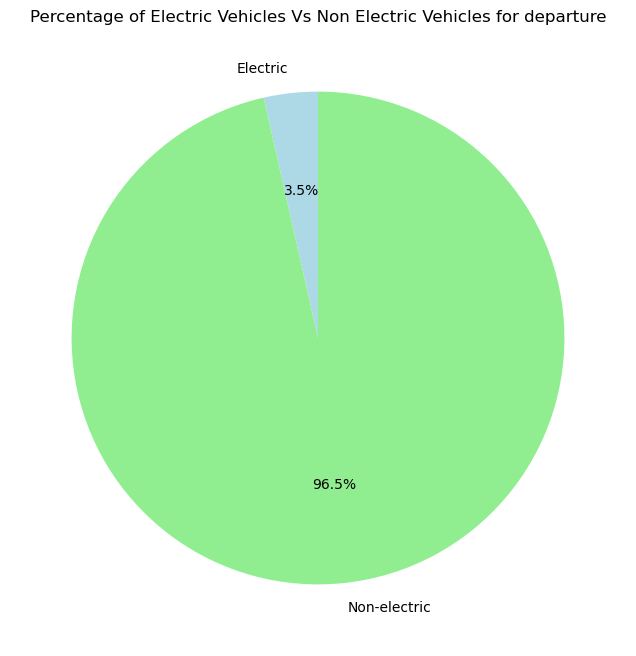

In [61]:
Percent = [part_electric_percent, part_non_electric_percent]
labels = ['Electric', 'Non-electric']
colors = ['lightblue', 'lightgreen']
plt.figure(figsize=(8, 8))
plt.pie(Percent, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Electric Vehicles Vs Non Electric Vehicles for departure')
plt.show()

In [43]:
groupin['Updated_time4'].unique()

array(['10:30:00', '10:35:00', '10:40:00', '10:45:00', '10:50:00',
       '10:55:00', '11:00:00', '10:25:00', '11:05:00', '10:20:00',
       '10:00:00', '10:05:00', '10:10:00', '10:15:00', '10:31:00',
       '10:36:00', '10:41:00', '10:46:00', '10:51:00', '10:56:00',
       '11:01:00', '10:27:00', '10:28:00', '10:29:00', '10:32:00',
       '10:33:00', '10:34:00', '10:37:00', '10:38:00', '10:39:00',
       '10:42:00', '10:43:00', '10:44:00', '10:47:00', '10:48:00',
       '10:49:00', '10:52:00', '10:53:00', '10:54:00', '10:57:00',
       ' 10:04:00', ' 10:05:00', ' 10:07:00', ' 10:08:00', ' 10:09:00',
       ' 10:10:00', ' 10:12:00', ' 10:13:00', ' 10:14:00', ' 10:16:00',
       ' 10:17:00', ' 10:18:00', ' 10:19:00', ' 10:20:00', ' 10:21:00',
       ' 10:23:00', ' 10:24:00', ' 10:26:00', ' 10:27:00', ' 10:28:00',
       ' 10:29:00', ' 10:30:00', ' 10:31:00', ' 10:32:00', ' 10:34:00',
       '09:30:00', '09:31:00', '09:33:00', '09:34:00', '09:35:00',
       '09:36:00', '09:37:00', '09:38

In [145]:
groupin['Updated_time4']=groupin['Updated_time4'].replace({' 10:04:00':'10:04:00', ' 10:05:00':'10:05:00', ' 10:07:00':'10:07:00', ' 10:08:00':'10:08:00', ' 10:09:00':'10:09:00',
       ' 10:10:00':'10:10:00', ' 10:12:00':'10:12:00', ' 10:13:00':'10:13:00', ' 10:14:00':'10:14:00', ' 10:16:00':'10:16:00',
       ' 10:17:00':'10:17:00', ' 10:18:00': '10:18:00',' 10:19:00':'10:19:00', ' 10:20:00':'10:20:00', ' 10:21:00':'10:21:00',
       ' 10:23:00':'10:23:00', ' 10:24:00':'10:24:00', ' 10:26:00':'10:26:00', ' 10:27:00':'10:27:00', ' 10:28:00':'10:28:00',
       ' 10:29:00':'10:29:00', ' 10:30:00':'10:30:00', ' 10:31:00':'10:31:00', ' 10:32:00':'10:32:00', ' 10:34:00':'10:34:00',' 10:00:00':'10:00:00', ' 10:15:00':'10:15:00',
       ' 10:25:00':'10:25:00'})

In [46]:
groupin['Updated_time4'].unique()

array(['10:30:00', '10:35:00', '10:40:00', '10:45:00', '10:50:00',
       '10:55:00', '11:00:00', '10:25:00', '11:05:00', '10:20:00',
       '10:00:00', '10:05:00', '10:10:00', '10:15:00', '10:31:00',
       '10:36:00', '10:41:00', '10:46:00', '10:51:00', '10:56:00',
       '11:01:00', '10:27:00', '10:28:00', '10:29:00', '10:32:00',
       '10:33:00', '10:34:00', '10:37:00', '10:38:00', '10:39:00',
       '10:42:00', '10:43:00', '10:44:00', '10:47:00', '10:48:00',
       '10:49:00', '10:52:00', '10:53:00', '10:54:00', '10:57:00',
       '10:04:00', '10:07:00', '10:08:00', '10:09:00', '10:12:00',
       '10:13:00', '10:14:00', '10:16:00', '10:17:00', '10:18:00',
       '10:19:00', '10:21:00', '10:23:00', '10:24:00', '10:26:00',
       '09:30:00', '09:31:00', '09:33:00', '09:34:00', '09:35:00',
       '09:36:00', '09:37:00', '09:38:00', '09:39:00', '09:40:00',
       '09:41:00', '09:42:00', '09:43:00', '09:44:00', '09:45:00',
       '09:46:00', '09:47:00', '09:48:00', '09:49:00', '09:50:

In [146]:
groupin = groupin.copy()
groupin['Updated_time4'] = pd.to_datetime(groupin['Updated_time4'])
groupin.loc[:, 'Peak_Hour1'] = groupin['Updated_time4'].dt.hour

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_4332\3620758028.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  groupin['Updated_time4'] = pd.to_datetime(groupin['Updated_time4'])


In [147]:
groupin['Peak_Hour1'].count()

2264

In [50]:
groupin

,Updated_dates,Updated_time4,UpdatedDirection3,Updated_electric10,Updated_brands1,Updated_weather3,UpdatedType2,Peak_Hour1
0,27-10-2022,2023-11-24 10:30:00,in,NaN,NaN,NaN,NaN,10
1,27-10-2022,2023-11-24 10:30:00,in,NaN,NaN,NaN,NaN,10
2,27-10-2022,2023-11-24 10:30:00,in,NaN,NaN,NaN,NaN,10
3,27-10-2022,2023-11-24 10:30:00,in,NaN,NaN,NaN,NaN,10
4,27-10-2022,2023-11-24 10:30:00,in,NaN,NaN,NaN,NaN,10
...,...,...,...,...,...,...,...,...
3281,26-10-2022,2023-11-24 11:00:00,in,NaN,NaN,NaN,car,11
3282,26-10-2022,2023-11-24 11:00:00,in,NaN,NaN,NaN,car,11
3283,26-10-2022,2023-11-24 11:00:00,in,NaN,NaN,NaN,bicycle,11
3284,26-10-2022,2023-11-24 11:00:00,in,NaN,NaN,NaN,car,11


In [51]:
Counted = groupin.groupby('Peak_Hour1').size()

In [52]:
Counted

Peak_Hour1
9      294
10    1866
11     104
dtype: int64

In [53]:
peak_hour3=Counted.idxmax()
peak_hour3

10

In [54]:
peak_hour_analysed = groupin[groupin['Peak_Hour1'] == peakHour]
electric_count1 = peak_hour_analysed[peak_hour_analysed['Updated_electric10'] == 'yes'].shape[0]
electric_count1

47

In [56]:
total_vehicles_peak_hour1 = peak_hour_analysed.shape[0]
part_electric1 = electric_count1 / total_vehicles_peak_hour1
part_electric1_percent=part_electric1*100
part_electric1_percent

2.5187566988210075

In [62]:
part_non_electric1_percent=100-part_electric1_percent
part_non_electric1_percent

97.48124330117899

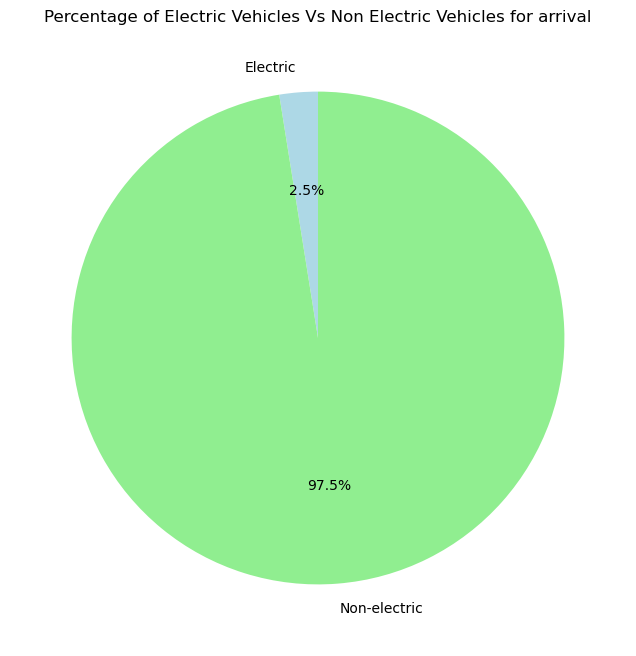

In [63]:
Percent1 = [part_electric1_percent, part_non_electric1_percent]
labels = ['Electric', 'Non-electric']
colors = ['lightblue', 'lightgreen']
plt.figure(figsize=(8, 8))
plt.pie(Percent1, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Electric Vehicles Vs Non Electric Vehicles for arrival')
plt.show()

In [69]:
PromotingBrands = groupout.loc[groupout['Updated_electric10'] == 'yes', 'Updated_brands1'].dropna().unique()

if PromotingBrands.size > 0:
    print("Brands promoting electric vehicles are:", PromotingBrands)
else:
    print("None of the brands are promoting electric vehicles")

None of the brands are promoting electric vehicles


In [70]:
PromotingBrands1 = groupin.loc[groupin['Updated_electric10'] == 'yes', 'Updated_brands1'].dropna().unique()

if PromotingBrands1.size > 0:
    print("Brands promoting electric vehicles are:", PromotingBrands1)
else:
    print("None of the brands are promoting electric vehicles")

Brands promoting electric vehicles are: ['Voi']


In [71]:
Promote_brands_number=PromotingBrands.size
Promote_brands_number

0

In [211]:
Promote_brands_number1=PromotingBrands1.size
Promote_brands_number1

1

In [212]:
total_brands=groupout['Updated_brands1'].isna().sum()

Non_promote_brands=total_brands-Promote_brands_number
Non_promote_brands

1017

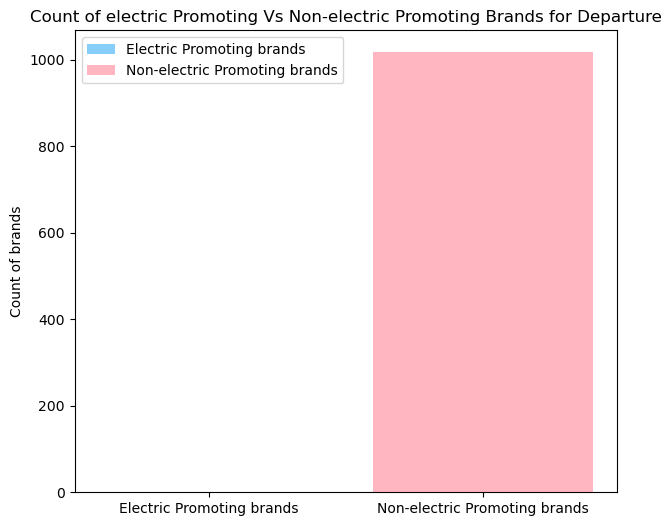

In [204]:
percent_brand = [Promote_brands_number, Non_promote_brands]
labels = ['Electric Promoting brands', 'Non-electric Promoting brands']
colors = ['lightskyblue', 'lightpink']

plt.figure(figsize=(7, 6))
plt.bar(labels, percent_brand, color=colors,label=labels)
plt.ylabel('Count of brands')
plt.title('Count of electric Promoting Vs Non-electric Promoting Brands for Departure')
plt.legend()
plt.show()

In [213]:
total_brands1=groupin['Updated_brands1'].size

Non_promote_brands1=total_brands1-Promote_brands_number1
Non_promote_brands1

2263

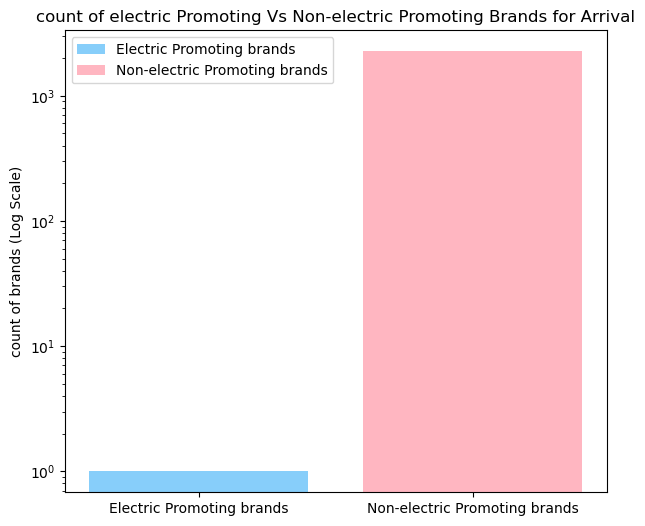

In [215]:
percent_brand1 = [Promote_brands_number1, Non_promote_brands1]
labels = ['Electric Promoting brands', 'Non-electric Promoting brands']
colors = ['lightskyblue', 'lightpink']

plt.figure(figsize=(7, 6))
plt.bar(labels, percent_brand1, color=colors, label=labels)
plt.ylabel('count of brands (Log Scale)')
plt.yscale('log')
plt.title('count of electric Promoting Vs Non-electric Promoting Brands for Arrival')
plt.legend()

plt.show()


In [119]:
groupout['Updated_weather3'].unique()

array([nan, 'overcast', 'clear'], dtype=object)

In [120]:
df_fft['Updated_weather3'].unique()

array([nan, 'overcast', 'clear', ' rainy', 'Sunny'], dtype=object)

In [122]:
df_ffg=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\Cleaned_file_2022.csv')

In [123]:
df_ffg['Updated_time4'].unique()

array(['10:30:00', '10:35:00', '10:40:00', '10:45:00', '10:50:00',
       '10:55:00', '11:00:00', nan, '10:20:00', '10:25:00', '11:05:00',
       '10:28:00', '10:29:00', '10:31:00', '10:32:00', '10:33:00',
       '10:34:00', '10:36:00', '10:37:00', '10:38:00', '10:39:00',
       '10:41:00', '10:42:00', '10:43:00', '10:44:00', '10:46:00',
       '10:47:00', '10:48:00', '10:49:00', '10:52:00', '10:53:00',
       '10:54:00', '10:56:00', '10:57:00', '10:58:00', '10:51:00',
       '09:01:00', '09:06:00', '09:11:00', '09:16:00', '09:21:00',
       '09:26:00', '09:20:00', '09:25:00', '09:30:00', '09:35:00',
       '09:40:00', '09:45:00', '09:50:00', '10:00:00', '10:05:00',
       '10:10:00', '10:15:00', '10:59:00', '11:01:00', '10:21:00',
       '10:22:00', '10:23:00', '10:24:00', '10:26:00', '10:27:00',
       '10:09:00', '10:11:00', '10:12:00', '10:14:00', '10:17:00',
       '10:18:00', '10:19:00', ' 10:04:00', ' 10:05:00', ' 10:07:00',
       ' 10:08:00', ' 10:09:00', ' 10:10:00', ' 10:12:

In [124]:
df_ffg['Updated_time4']=df_ffg['Updated_time4'].replace({' 10:04:00':'10:04:00', ' 10:05:00':'10:05:00', ' 10:07:00':'10:07:00', ' 10:08:00':'10:08:00', ' 10:09:00':'10:09:00',
       ' 10:10:00':'10:10:00', ' 10:12:00':'10:12:00', ' 10:13:00':'10:13:00', ' 10:14:00':'10:14:00', ' 10:16:00':'10:16:00',
       ' 10:17:00':'10:17:00', ' 10:18:00': '10:18:00',' 10:19:00':'10:19:00', ' 10:20:00':'10:20:00', ' 10:21:00':'10:21:00',
       ' 10:23:00':'10:23:00', ' 10:24:00':'10:24:00', ' 10:26:00':'10:26:00', ' 10:27:00':'10:27:00', ' 10:28:00':'10:28:00',
       ' 10:29:00':'10:29:00', ' 10:30:00':'10:30:00', ' 10:31:00':'10:31:00', ' 10:32:00':'10:32:00', ' 10:34:00':'10:34:00',' 10:00:00':'10:00:00', ' 10:15:00':'10:15:00',
       ' 10:25:00':'10:25:00'})

In [125]:
df_ffg['Updated_time4'].unique()

array(['10:30:00', '10:35:00', '10:40:00', '10:45:00', '10:50:00',
       '10:55:00', '11:00:00', nan, '10:20:00', '10:25:00', '11:05:00',
       '10:28:00', '10:29:00', '10:31:00', '10:32:00', '10:33:00',
       '10:34:00', '10:36:00', '10:37:00', '10:38:00', '10:39:00',
       '10:41:00', '10:42:00', '10:43:00', '10:44:00', '10:46:00',
       '10:47:00', '10:48:00', '10:49:00', '10:52:00', '10:53:00',
       '10:54:00', '10:56:00', '10:57:00', '10:58:00', '10:51:00',
       '09:01:00', '09:06:00', '09:11:00', '09:16:00', '09:21:00',
       '09:26:00', '09:20:00', '09:25:00', '09:30:00', '09:35:00',
       '09:40:00', '09:45:00', '09:50:00', '10:00:00', '10:05:00',
       '10:10:00', '10:15:00', '10:59:00', '11:01:00', '10:21:00',
       '10:22:00', '10:23:00', '10:24:00', '10:26:00', '10:27:00',
       '10:09:00', '10:11:00', '10:12:00', '10:14:00', '10:17:00',
       '10:18:00', '10:19:00', '10:04:00', '10:07:00', '10:08:00',
       '10:13:00', '10:16:00', '09:31:00', '09:33:00', '0

In [126]:
df_ffg

,Updated_dates,Updated_time4,UpdatedDirection3,Updated_electric10,Updated_brands1,Updated_weather3,UpdatedType2
0,27-10-2022,10:30:00,in,NaN,NaN,NaN,NaN
1,27-10-2022,10:30:00,in,NaN,NaN,NaN,NaN
2,27-10-2022,10:30:00,in,NaN,NaN,NaN,NaN
3,27-10-2022,10:30:00,in,NaN,NaN,NaN,NaN
4,27-10-2022,10:30:00,in,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3281,26-10-2022,11:00:00,in,NaN,NaN,NaN,car
3282,26-10-2022,11:00:00,in,NaN,NaN,NaN,car
3283,26-10-2022,11:00:00,in,NaN,NaN,NaN,bicycle
3284,26-10-2022,11:00:00,in,NaN,NaN,NaN,car


In [128]:
df_ffg['Updated_time4'] = pd.to_datetime(df_ffg['Updated_time4'])

# Filter rows where the weather is 'overcast'
overcast_Data = df_ffg[df_ffg['Updated_weather3'] == 'overcast']

# Calculate the total time spent with overcast weather
Total_overcast_time = overcast_Data['Updated_time4'].count()

In [129]:
Total_overcast_time

62

In [130]:
total_weather=df_ffg['Updated_weather3'].size
total_weather

3286

In [131]:
percent_overcast=(Total_overcast_time/total_weather)*100

In [132]:
percent_overcast

1.8867924528301887

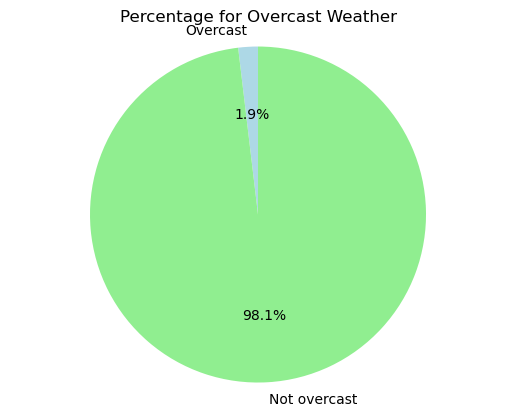

In [134]:
Rest_percent = 100 - percent_overcast  # Assuming the complement is clear weather

# Create data for the pie chart
Percentages = [percent_overcast, Rest_percent]
labels = ['Overcast', 'Not overcast']
colors = ['lightblue', 'lightgreen']

# Plot a pie chart
plt.pie(Percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage for Overcast Weather')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

## Analysis of the csv files for the year 2023

In [135]:
df_fnn=pd.read_csv('C:\\Users\\Ambik Mitra\\OneDrive\\Documents\\Task3\\Cleaned_file_2023.csv')

In [136]:
df_fnn

,Updated_Date2,Updated_Time2,Updated_Type6,Updated_Direction2,Updated_Brand2,Updated_Is_Electric3,Updated_Weather
0,24-10-2023,09:30:00,car,in,NaN,No,NaN
1,24-10-2023,09:30:00,car,in,NaN,No,NaN
2,24-10-2023,09:30:00,car,in,NaN,No,NaN
3,24-10-2023,09:30:00,car,in,NaN,No,NaN
4,24-10-2023,09:30:00,car,in,NaN,No,NaN
...,...,...,...,...,...,...,...
7561,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7562,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7563,23-10-2023,10:55:00,car,in,NaN,NaN,NaN
7564,23-10-2023,10:55:00,car,in,NaN,NaN,NaN


In [150]:
groupings = df_fnn.groupby('Updated_Direction2')
groupin1 = groupings.get_group('in')
groupout1 = groupings.get_group('out')

In [152]:
groupout1

,Updated_Date2,Updated_Time2,Updated_Type6,Updated_Direction2,Updated_Brand2,Updated_Is_Electric3,Updated_Weather
278,23-10-2023,10:05:00,bus,out,NaN,NaN,NaN
279,23-10-2023,10:05:00,bus,out,NaN,NaN,NaN
280,23-10-2023,10:05:00,car,out,NaN,NaN,NaN
281,23-10-2023,10:05:00,taxi,out,NaN,NaN,NaN
282,23-10-2023,10:05:00,car,out,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7273,26-10-2023,09:15:00,bus,out,NaN,NaN,Sunny
7274,26-10-2023,09:15:00,car,out,NaN,NaN,Sunny
7275,26-10-2023,09:15:00,car,out,NaN,NaN,Sunny
7276,26-10-2023,09:15:00,car,out,NaN,NaN,Sunny


In [153]:
groupout1['Updated_Time2'] = pd.to_datetime(groupout1['Updated_Time2'])
groupout1['peak_hr'] = groupout1['Updated_Time2'].dt.hour
counts = groupout1.groupby('peak_hr').size()

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_4332\738201816.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  groupout1['Updated_Time2'] = pd.to_datetime(groupout1['Updated_Time2'])
C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_4332\738201816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupout1['Updated_Time2'] = pd.to_datetime(groupout1['Updated_Time2'])
C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_4332\738201816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [155]:
groupin1['Updated_Time2'] = pd.to_datetime(groupin1['Updated_Time2'])
groupin1['peak_hrs'] = groupin1['Updated_Time2'].dt.hour
counts1 = groupin1.groupby('peak_hrs').size()

C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_4332\287602009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupin1['Updated_Time2'] = pd.to_datetime(groupin1['Updated_Time2'])
C:\Users\Ambik Mitra\AppData\Local\Temp\ipykernel_4332\287602009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  groupin1['peak_hrs'] = groupin1['Updated_Time2'].dt.hour


In [156]:
groupin1['Updated_Time2'].count()

5234

In [157]:
groupout1['Updated_Time2'].count()

2331

In [158]:
peakhr = counts.idxmax()

In [159]:
peakhr1=counts1.idxmax()

In [160]:
peakhr

10

In [161]:
peakhr1

10

In [168]:
peak_ana = groupin1[groupin1['peak_hrs'] == peakhr1]
electric_count2 = peak_ana[peak_ana['Updated_Is_Electric3'] == 'yes'].shape[0]

total_electric=groupin1['Updated_Is_Electric3'].size
part_electric_percent2=(electric_count2/total_electric)*100
part_electric_percent2

0.0

In [169]:
part_non_electric_percent2=100.0-part_electric_percent2
part_non_electric_percent2

100.0

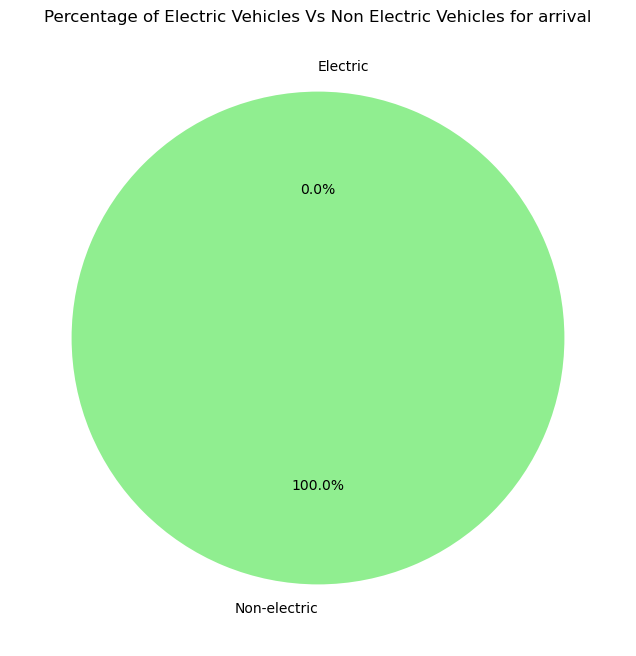

In [170]:
Percent5 = [part_electric_percent2, part_non_electric_percent2]
labels = ['Electric', 'Non-electric']
colors = ['lightblue', 'lightgreen']
plt.figure(figsize=(8, 8))
plt.pie(Percent5, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Electric Vehicles Vs Non Electric Vehicles for arrival')
plt.show()

In [171]:
peak_ana1 = groupout1[groupout1['peak_hr'] == peakhr]
electric_count3 = peak_ana1[peak_ana1['Updated_Is_Electric3'] == 'yes'].shape[0]

total_electric2=groupout1['Updated_Is_Electric3'].size
part_electric_percent3=(electric_count3/total_electric2)*100
part_electric_percent3

0.0

In [172]:
part_non_electric_percent4=100.0-part_electric_percent3
part_non_electric_percent4

100.0

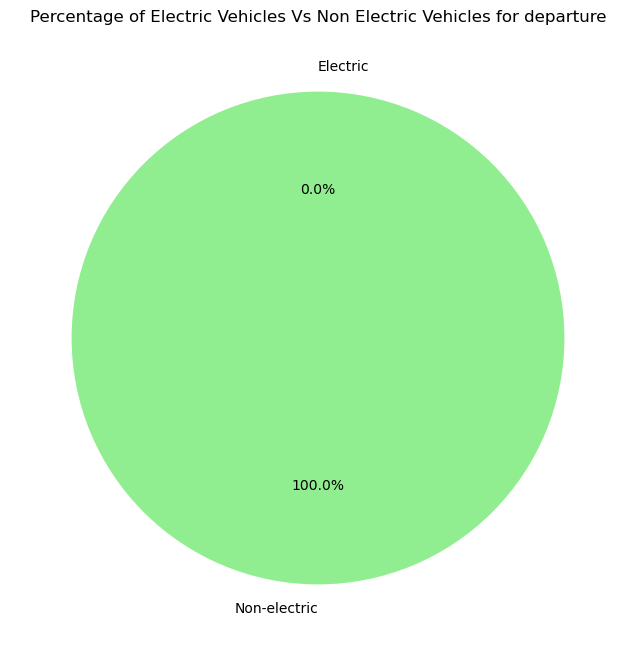

In [180]:
Percent5 = [part_electric_percent3, part_non_electric_percent4]
labels = ['Electric', 'Non-electric']
colors = ['lightblue', 'lightgreen']
plt.figure(figsize=(8, 8))
plt.pie(Percent5, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Electric Vehicles Vs Non Electric Vehicles for departure')
plt.show()

In [197]:
PromotingBrandsto = groupout1.loc[groupout1['Updated_Is_Electric3'] == 'yes', 'Updated_Brand2'].dropna().unique()

if PromotingBrandsto.size > 0:
    print("Brands promoting electric vehicles are:", PromotingBrandsto)
else:
    print("None of the brands are promoting electric vehicles")

None of the brands are promoting electric vehicles


In [208]:
Promote_brd1=PromotingBrandsto.size
Promote_brd1

0

In [209]:
total_brd1=groupout1['Updated_Brand2'].size

Non_promote_brd1=total_brd1-Promote_brd1
Non_promote_brd1

2331

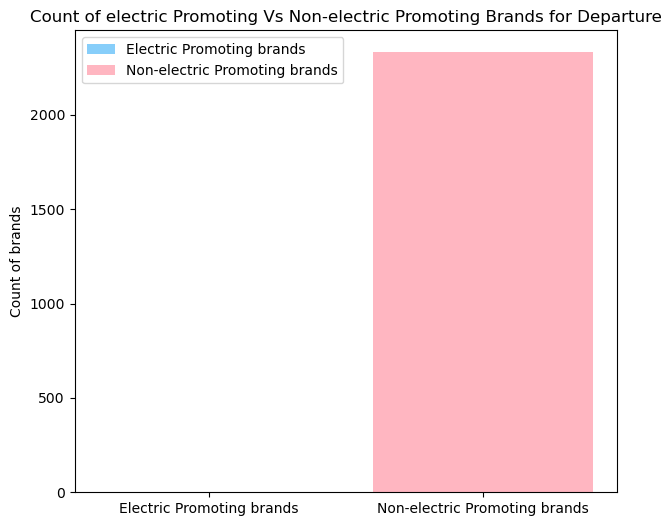

In [216]:
percent_brd1 = [Promote_brd1, Non_promote_brd1]
labels2 = ['Electric Promoting brands', 'Non-electric Promoting brands']
colors2 = ['lightskyblue', 'lightpink']

plt.figure(figsize=(7, 6))
plt.bar(labels, percent_brd1, color=colors2,label=labels2)
plt.ylabel('Count of brands')
plt.title('Count of electric Promoting Vs Non-electric Promoting Brands for Departure')
plt.legend()
plt.show()

In [217]:
PrmtingBrd = groupin1.loc[groupin1['Updated_Is_Electric3'] == 'yes', 'Updated_Brand2'].dropna().unique()

if PrmtingBrd.size > 0:
    print("Brands promoting electric vehicles are:", PrmtingBrd)
else:
    print("None of the brands are promoting electric vehicles")

None of the brands are promoting electric vehicles


In [218]:
Promote_br1=PrmtingBrd.size
Promote_br1

0

In [219]:
total_br=groupin1['Updated_Brand2'].size

Non_promote_br=total_br-Promote_br1
Non_promote_br

5234

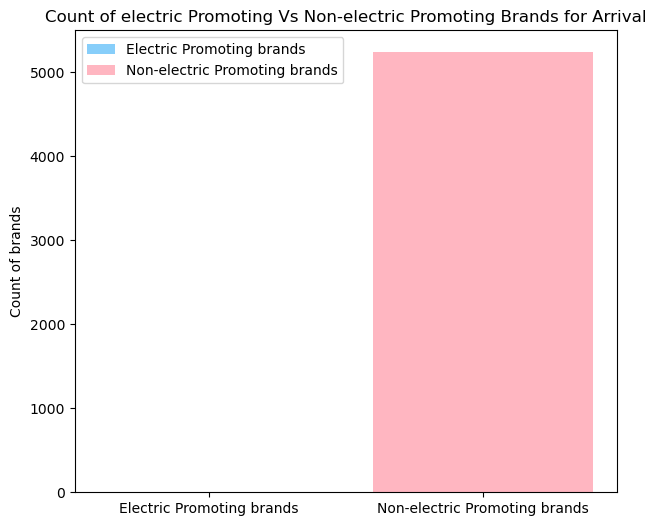

In [220]:
b1 = [Promote_br1, Non_promote_br]
labels7 = ['Electric Promoting brands', 'Non-electric Promoting brands']
colors7 = ['lightskyblue', 'lightpink']

plt.figure(figsize=(7, 6))
plt.bar(labels7, b1, color=colors7,label=labels7)
plt.ylabel('Count of brands')
plt.title('Count of electric Promoting Vs Non-electric Promoting Brands for Arrival')
plt.legend()
plt.show()

In [228]:
df_fnn['Updated_Time2'] = pd.to_datetime(df_fnn['Updated_Time2'])

# Filter rows where the weather is 'overcast'
overcast_dt = df_fnn[df_fnn['Updated_Weather'] == 'Overcast']

# Calculate the total time spent with overcast weather
Total_overcast = overcast_dt['Updated_Time2'].count()

In [229]:
Total_overcast

134

In [230]:
total_wt=df_fnn['Updated_Weather'].size
total_wt

7566

In [231]:
percent_overct=(Total_overcast/total_wt)*100
percent_overct

1.7710811525244514

In [233]:
p_rest=100.0-percent_overct
p_rest

98.22891884747555

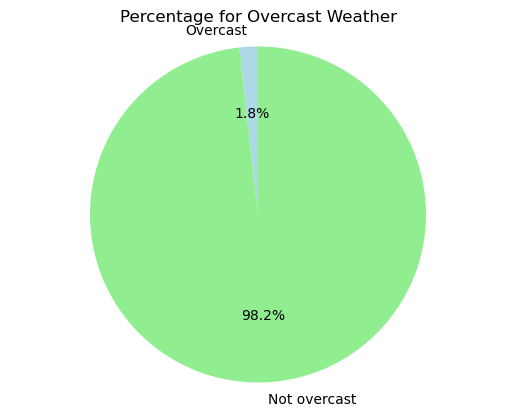

In [234]:
# Create data for the pie chart
Pt = [percent_overct, p_rest]
labels10 = ['Overcast', 'Not overcast']
colors10 = ['lightblue', 'lightgreen']

# Plot a pie chart
plt.pie(Pt, labels=labels10, autopct='%1.1f%%', startangle=90, colors=colors10)
plt.title('Percentage for Overcast Weather')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()